  ## SurpriseHousing Case Study Advanced Regression
   - As per the instructions by platform, we have suppose to upload the github link for the final  submission as per previous case study . 
   - But on the submission page, it also instructed to upload the zip file. So to avoid the confusion, I have uploaded the zip file also for final submission and Here proving git link to validate if its required.
### `Below is the Git link of the Case Study:`

   ## [Git Link](https://github.com/sharmaiiitb/SurpriseHousing-Case-Study-Advanced-Regression.git)

 

## Steps Involved for model creation
   - Reading, understanding and visualising the data.
   - Preparing data for modelling.
        - Encoding Binary Variable in to 0 or 1.
        - Categorical Variable to dummy Variable
        - Split Data in to Train-Test split
        - Rescalling the Features.
   - Training the model
   - Residual Analysis
   - Making Predictions and Evaluation on Test data
   - Tunning model with Regularization methods:-
        - Ridge Regularization
        - Lasso Regularization
   - Model Comparrision
   - Evaluation

### Important Libraries

In [1]:
# Importing Numpy and Pandas libraries
import numpy as np
import pandas as pd

# Importing required libraries for visualization.

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import for statistical functions
import scipy.stats as stats
import scipy as sp
# import stats model for qq plot
import statsmodels.api as sm
import statsmodels.tsa.api as smt

from sklearn.linear_model import Lasso,Ridge

import datetime
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Import To Suppress ( Ignore ) Warnings

import warnings
warnings.filterwarnings('ignore')

# Set to show displayed columns and rows to maximum 500

pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 500

   ## Step 1: Importing data (Reading ) and  Understanding Data


In [2]:
# importing and Reading the data file train.csv

SurpriseHousing = pd.read_csv('train.csv', low_memory=False)

In [3]:
# Displaying the top 5 rows to see the data and validate whether everything imported correctly or not

SurpriseHousing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
# clear if columns having any extra space 

SurpriseHousing.columns = SurpriseHousing.columns.str.replace(' ', '')

In [5]:
# Checking shape of dataset ( number of rows and columns )

SurpriseHousing.shape

(1460, 81)

  - Number of Rows    : 1460 
  - Number of Columns : 81 
    

In [6]:
# Checking datatypes for each columns in dataset

SurpriseHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Inference:-
  - Dataset having `1460 Row and 81 Columns`.
  - Datatypes are numerical column (float64 - 3 , int64 - 35 ) categorical column - object - 43
  - `Id` column is just an index column its not useful in analysis it can be dropped
  - `SalePrice` is dependent variable and this case our target variable.

In [7]:
# Summary of all the numerical columns in the dataset

SurpriseHousing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

## Exploratory Data Analysis (EDA)

In [8]:
# Checking for any duplicate data in dataset

SurpriseHousing.duplicated().sum()

0

#### Inference
- No duplicate data present in dataset

In [9]:
# Checking for null/missing values in the dataset

SurpriseHousing.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

##### Inference: 
  - PoolQC, MiscFeature, Alley, Fence, FireplaceQu having soo many Nan / missing value present

In [10]:
# Checking top 5 Percentage of missing values in datasse (descending order)

percentmissing = round((SurpriseHousing.isna().sum()/len(SurpriseHousing.index)*100),2).sort_values(ascending=False)
percentmissing.head()

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
dtype: float64

In [11]:
# listing Percentage of missing values greater than 0 in datasse with features and their missing % value.

percentmissing = pd.DataFrame(round(SurpriseHousing.isnull().sum()/len(SurpriseHousing.index)*100,2)
                              .sort_values(ascending=False),columns=["missing %"])
percentmissing.index.name = 'Features'
percentmissing_SurpriseHousing = percentmissing[percentmissing["missing %"] > 0]
percentmissing_SurpriseHousing

missing %
Features               
PoolQC            99.52
MiscFeature       96.30
Alley             93.77
Fence             80.75
FireplaceQu       47.26
LotFrontage       17.74
GarageYrBlt        5.55
GarageCond         5.55
GarageType         5.55
GarageFinish       5.55
GarageQual         5.55
BsmtFinType2       2.60
BsmtExposure       2.60
BsmtQual           2.53
BsmtCond           2.53
BsmtFinType1       2.53
MasVnrArea         0.55
MasVnrType         0.55
Electrical         0.07

### Inference
- PoolQC-99.52 %, MiscFeature- 96.30%, Alley-93.77, Fence-80.75, FireplaceQu-47.26 containg more than 40 % missing value we can drop it, 
- even though we can impute these null with some value but it can create data imbalance also it won't play any role in model building

### Data Cleaning
### Dropping irrelevent Column

In [12]:
# Dropping the column which contains more than 40% missing value [ 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu' ]
# even though we can impute these null with some value but it can create data imbalance also it won't play any role in model building
# Dropping the column 'Id' as it is only index column and irrelavent.
# Dropping the column 'MoSold' its not useful during model creation

SurpriseHousing.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1, inplace = True)

SurpriseHousing.drop(['Id','MoSold'], axis=1, inplace = True)

## Inference :
 -  Dropping the column which contains more than 40% missing value [ 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu' ]
     - even though we can impute these null with some value but it can create data imbalance also it won't play any role in model building
 - Dropping the column 'Id' as it is only index column and irrelavent.
 - Dropping the column 'MoSold' its not useful during model creation

In [13]:
# Checking Shape of datset after removing unwanted columns

SurpriseHousing.shape

(1460, 74)

### Data Processing 
 - Treating NaN / missing value
      - Imputing the missing data
 - Remove unwanted columns
 - Outlier Treatment

In [14]:
# Checking if any row with all null values

len(SurpriseHousing.columns[SurpriseHousing.isnull().all()].tolist())

0

- row having 0 null value

In [15]:
# checking LotFrontage , GarageYrBlt, MasVnrArea Statistical data

SurpriseHousing[['LotFrontage','GarageYrBlt','MasVnrArea']].describe()

LotFrontage  GarageYrBlt   MasVnrArea
count  1201.000000  1379.000000  1452.000000
mean     70.049958  1978.506164   103.685262
std      24.284752    24.689725   181.066207
min      21.000000  1900.000000     0.000000
25%      59.000000  1961.000000     0.000000
50%      69.000000  1980.000000     0.000000
75%      80.000000  2002.000000   166.000000
max     313.000000  2010.000000  1600.000000

### Inference :
#### according to value of mean median ,mode and quantile value
    -  LotFrontage have some outliers imputing it with median
    -  GarageYrBlt looks clean and few outliers it can impute with mean
    -  MasVnrArea its clearly show outliers it can impute with median

### Imputing missing data (Nan)

In [16]:
# imputing column LotFrontage and MasVnrArea missing values with the median since its contains high numbers of outliers

SurpriseHousing['LotFrontage'] = SurpriseHousing['LotFrontage'].fillna(SurpriseHousing['LotFrontage'].median())
SurpriseHousing['MasVnrArea'] = SurpriseHousing['MasVnrArea'].fillna(SurpriseHousing['MasVnrArea'].median())


In [17]:
# for `GarageCond`, `GarageType`, `GarageFinish`, `GarageQual` according do SurpriseHousing description `Na` means No Garage
# replacing `NA` with No Garage

SurpriseHousing['GarageType'] =SurpriseHousing['GarageType'].fillna('No Garage')
SurpriseHousing['GarageFinish'] =SurpriseHousing['GarageFinish'].fillna('No Garage')
SurpriseHousing['GarageQual'] =SurpriseHousing['GarageQual'].fillna('No Garage')
SurpriseHousing['GarageCond'] =SurpriseHousing['GarageCond'].fillna('No Garage')

In [18]:
# according to SurpriseHousingdescription for `BsmtCond`, `BsmtFinType1` replace NA means No Basement so replacing it

SurpriseHousing['BsmtCond'] =SurpriseHousing['BsmtCond'].fillna('No Basement')
SurpriseHousing['BsmtFinType1'] =SurpriseHousing['BsmtFinType1'].fillna('No Basement')

# also for `BsmtQual` ,`BsmtExposure`, `BsmtFinType2` NA means No Basement
SurpriseHousing['BsmtQual'] =SurpriseHousing['BsmtQual'].fillna('No Basement')
SurpriseHousing['BsmtExposure'] =SurpriseHousing['BsmtExposure'].fillna('No Basement')
SurpriseHousing['BsmtFinType2'] =SurpriseHousing['BsmtFinType2'].fillna('No Basement')


In [19]:
# according to SurpriseHousingdescription for `BsmtCond`, `BsmtFinType1` replace NA means No Basement so replacing it

SurpriseHousing['BsmtCond'] =SurpriseHousing['BsmtCond'].fillna('No Basement')
SurpriseHousing['BsmtFinType1'] =SurpriseHousing['BsmtFinType1'].fillna('No Basement')

# also for `BsmtQual` ,`BsmtExposure`, `BsmtFinType2` NA means No Basement
SurpriseHousing['BsmtQual'] =SurpriseHousing['BsmtQual'].fillna('No Basement')
SurpriseHousing['BsmtExposure'] =SurpriseHousing['BsmtExposure'].fillna('No Basement')
SurpriseHousing['BsmtFinType2'] =SurpriseHousing['BsmtFinType2'].fillna('No Basement')


In [20]:
# Now imputing others missing values 
# for the `below Garage columns` imputing the null values with 'mode'

for col in ('GarageType', 'GarageFinish','GarageQual', 'GarageCond', 'GarageYrBlt'):
    
    SurpriseHousing[col] = SurpriseHousing[col].fillna(SurpriseHousing[col].mode()[0])
    
# for the `Bsmt` (Basement) columns imputing the null values with 'mode'

for col in ('BsmtCond', 'BsmtFinType1', 'BsmtQual', 'BsmtExposure', 'BsmtFinType2'):
    
    SurpriseHousing[col] = SurpriseHousing[col].fillna(SurpriseHousing[col].mode()[0])
    
# for the columns Masonry veneer and Electrical imputing the null values with 'mode'

for col in ('MasVnrType', 'Electrical'):
    
     SurpriseHousing[col] = SurpriseHousing[col].fillna(SurpriseHousing[col].mode()[0])
    
    

In [21]:
# now cross checking the presence of any more null values

SurpriseHousing.isnull().values.any()

False

- After imputing data now no null value present

In [22]:
# Checking for null/missing values in the dataset

SurpriseHousing.isnull().sum().sort_values(ascending=False).head()

MSSubClass      0
GarageType      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
dtype: int64

### Inference :
   - All the missing values Treated 
   - Now no missing value present


------------------------------------------------------------------------------------------
###### Validation and Data correction according to data description
   - creating some new column with the help of two column for some meaningfull sense

In [23]:
#converting ;YearBuilt' ,'YearRemodAdd' , 'GarageYrBlt','YrSold'  to datetime

SurpriseHousing['YearBuilt'] = pd.to_datetime(SurpriseHousing.YearBuilt, format='%Y')
SurpriseHousing['YearBuilt'] = pd.DatetimeIndex(SurpriseHousing['YearBuilt']).year

SurpriseHousing['YearRemodAdd'] = pd.to_datetime(SurpriseHousing.YearRemodAdd, format='%Y')
SurpriseHousing['YearRemodAdd'] = pd.DatetimeIndex(SurpriseHousing['YearRemodAdd']).year

SurpriseHousing['GarageYrBlt'] = pd.to_datetime(SurpriseHousing.GarageYrBlt, format='%Y')
SurpriseHousing['GarageYrBlt'] = pd.DatetimeIndex(SurpriseHousing['GarageYrBlt']).year

SurpriseHousing['YrSold'] = pd.to_datetime(SurpriseHousing.YrSold, format='%Y')
SurpriseHousing['YrSold'] = pd.DatetimeIndex(SurpriseHousing['YrSold']).year

In [24]:
# Cross Checking the top 5 rows affter data type columns

SurpriseHousing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd         2003   
1          TA             6        Typ           1     Attchd         1976   
2          Gd             6        Typ           1     Attchd         2001   
3          Gd          

### Derived Metrics
----------------------------------------------------------------------------------------------
   - creating some new column with the help of two column for some meaningfull sense

In [25]:
#creating new columns houseAge, remodelAge, garageAge from the year columns

SurpriseHousing['HouseAge'] = SurpriseHousing.YrSold - SurpriseHousing.YearBuilt
SurpriseHousing['RemodelAge'] = SurpriseHousing.YrSold - SurpriseHousing.YearRemodAdd
SurpriseHousing['GarageAge'] = SurpriseHousing.YrSold - SurpriseHousing.GarageYrBlt

In [26]:
# now since, we have created new Features from YearBuilt, YearRemodAdd, YrSold, and GarageYrBlt ,
# so we can drop these column as we will use the derived column for analysis

SurpriseHousing.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'],axis=1, inplace=True)

In [27]:
SurpriseHousing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        Ex          Y      SBrkr       856   
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1          Gd             8        Typ   
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
0           0     Attchd          RFn           2         548         TA   
1           1     Attchd          RFn           2         460         TA   
2           1     Attchd          R

**from data description few columns are categorical converting them to some meaniful value according to data description.**

In [28]:
# Checking MSSubClass, OverallCond, OverallQual value count in columns

print(SurpriseHousing['MSSubClass'].value_counts())
print(SurpriseHousing['OverallCond'].value_counts())
print(SurpriseHousing['OverallQual'].value_counts())


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


In [29]:
# converting 'MSSubClass' ,'OverallCond', 'OverallQual' to categorical as per data description

SurpriseHousing.MSSubClass = SurpriseHousing.MSSubClass.map({20:'1Story1946',  30:'1Story1945', 40:'1StoryFinished', 45:'1-1/2StoryUnfinished',
                                            50:'1-1/2StoryFinished', 60:'2Story1946', 70:'2Story1946', 75:'2-1/2Story',
                                            80:'SplitMulti', 85:'SplitFoyer', 90:'Duplex', 120:'1StoryPud', 160:'2StoryPud',
                                            180:'PudMulti', 190:'2Family'})

SurpriseHousing.OverallCond = SurpriseHousing.OverallCond.map({10:'OC_vExcellent', 9: 'OC_Excellent', 8: 'OC_Good',7:'OC_Good', 6: 'OC_Average',
                                                                  5: 'OC_Average',4: 'OC_blwAverage',3: 'OC_Fair',2: 'OC_Poor',1: 'OC_Very Poor'})

SurpriseHousing.OverallQual = SurpriseHousing.OverallQual.map({10:'OQ_VExcellent', 9:'OQ_Excellent',8:'OQ_VGood', 7:'OQ_Good', 6:'OQ_AbvAverage',
                                                                  5:'OQ_Average', 4:'OQ_BlwAverage',3:'OQ_Fair',2:'OQ_Poor',1:'OQ_VPoor'})
# checking data after converting

SurpriseHousing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  2Story1946       RL         65.0     8450   Pave      Reg         Lvl   
1  1Story1946       RL         80.0     9600   Pave      Reg         Lvl   
2  2Story1946       RL         68.0    11250   Pave      IR1         Lvl   
3  2Story1946       RL         60.0     9550   Pave      IR1         Lvl   
4  2Story1946       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle    OverallQual OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story        OQ_Good  OC_Average     Gable  CompShg     VinylSd   
1     1Story  OQ_AbvAverage     OC_Good     Gable  CompShg     MetalSd   
2     2Story        OQ_Good  OC_Average     Gable  CompShg     VinylSd   
3     2Story        OQ_Good  OC_Average     Gable  CompShg     Wd Sdng   
4     2Story       OQ_VGood  OC_Average     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        Ex          Y      SBrkr       856   
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1          Gd             8        Typ   
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
0           0     Attchd          RFn           2         548         TA   
1           1     Attchd          RFn           2         460         TA   
2           1     Attchd     

## Outlier Treatment 

### Removing Data which is Highly Skewed on any side (fixing class imbalance)
   **Removing data which highly assiciated with one value removing numerical variale that have more than 90% data associated one value. (1450*95)/100 = 1435.5 means we will remove the column which repeat one value more than 1435 times bcz its skewed to only one value**
 


In [30]:
# Droping the columns that have more than 99% values associated with specific value


def HighNumericalValue():
    column = []
    numerical_columns = SurpriseHousing.select_dtypes(include=['int64', 'float64'])
    for col in (numerical_columns):
        if(SurpriseHousing[col].value_counts().max() >= 1435):
            column.append(col)
    return column

removed_col = HighNumericalValue()
print(removed_col)

# Removing the columns with highly skewed data

SurpriseHousing.drop(removed_col, axis = 1, inplace = True)

# Checking data after droping
SurpriseHousing.head()

['3SsnPorch', 'PoolArea']


MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  2Story1946       RL         65.0     8450   Pave      Reg         Lvl   
1  1Story1946       RL         80.0     9600   Pave      Reg         Lvl   
2  2Story1946       RL         68.0    11250   Pave      IR1         Lvl   
3  2Story1946       RL         60.0     9550   Pave      IR1         Lvl   
4  2Story1946       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle    OverallQual OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story        OQ_Good  OC_Average     Gable  CompShg     VinylSd   
1     1Story  OQ_AbvAverage     OC_Good     Gable  CompShg     MetalSd   
2     2Story        OQ_Good  OC_Average     Gable  CompShg     VinylSd   
3     2Story        OQ_Good  OC_Average     Gable  CompShg     Wd Sdng   
4     2Story       OQ_VGood  OC_Average     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        Ex          Y      SBrkr       856   
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1          Gd             8        Typ   
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
0           0     Attchd          RFn           2         548         TA   
1           1     Attchd          RFn           2         460         TA   
2           1     Attchd     

## Inference
**Here in '3SsnPorch', 'PoolArea' having more than 99% values are same so no mean to use these, hence dropped these column.**

In [31]:
# Droping the columns that have more than 99% (1450*99/1oo= 1435.5) values associated from a specific value

def HighCategoricalValue():
    column = []
    categorical_columns = SurpriseHousing.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(SurpriseHousing[col].value_counts().max() >= 1435):
            column.append(col)
    return column

Removed_col = HighCategoricalValue()
print(Removed_col)

# Removing the columns with highly skewed data

SurpriseHousing.drop(Removed_col, axis = 1, inplace = True)
# Checking data after removing

SurpriseHousing.head()

['Street', 'Utilities', 'Condition2']


MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0  2Story1946       RL         65.0     8450      Reg         Lvl    Inside   
1  1Story1946       RL         80.0     9600      Reg         Lvl       FR2   
2  2Story1946       RL         68.0    11250      IR1         Lvl    Inside   
3  2Story1946       RL         60.0     9550      IR1         Lvl    Corner   
4  2Story1946       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 BldgType HouseStyle    OverallQual  \
0       Gtl      CollgCr       Norm     1Fam     2Story        OQ_Good   
1       Gtl      Veenker      Feedr     1Fam     1Story  OQ_AbvAverage   
2       Gtl      CollgCr       Norm     1Fam     2Story        OQ_Good   
3       Gtl      Crawfor       Norm     1Fam     2Story        OQ_Good   
4       Gtl      NoRidge       Norm     1Fam     2Story       OQ_VGood   

  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0  OC_Average     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1     OC_Good     Gable  CompShg     MetalSd     MetalSd       None   
2  OC_Average     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3  OC_Average     Gable  CompShg     Wd Sdng     Wd Shng       None   
4  OC_Average     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             1          Gd             8        Typ           0     Attchd   
1             1          TA             6        Typ           1     Attchd   
2             1          Gd             6        Typ           1     Attchd   
3             1          Gd             7        Typ           1     Detchd   
4             1          Gd             9        Typ           1     Attchd   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn           2         548         TA         TA          Y   
1          RFn           2         460         TA         TA          Y   
2          RFn           2         608         TA         TA  

## Inference
**Here in 'Street', 'Utilities', 'Condition2' having more than 99% values are same so no mean to use these, hence dropped these column.**

In [32]:
# listing out the list of numerical/continous features

num_var = SurpriseHousing.select_dtypes(include=['int64', 'float']).columns
print(num_var)
print(len(num_var))

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice', 'HouseAge',
       'RemodelAge', 'GarageAge'],
      dtype='object')
30


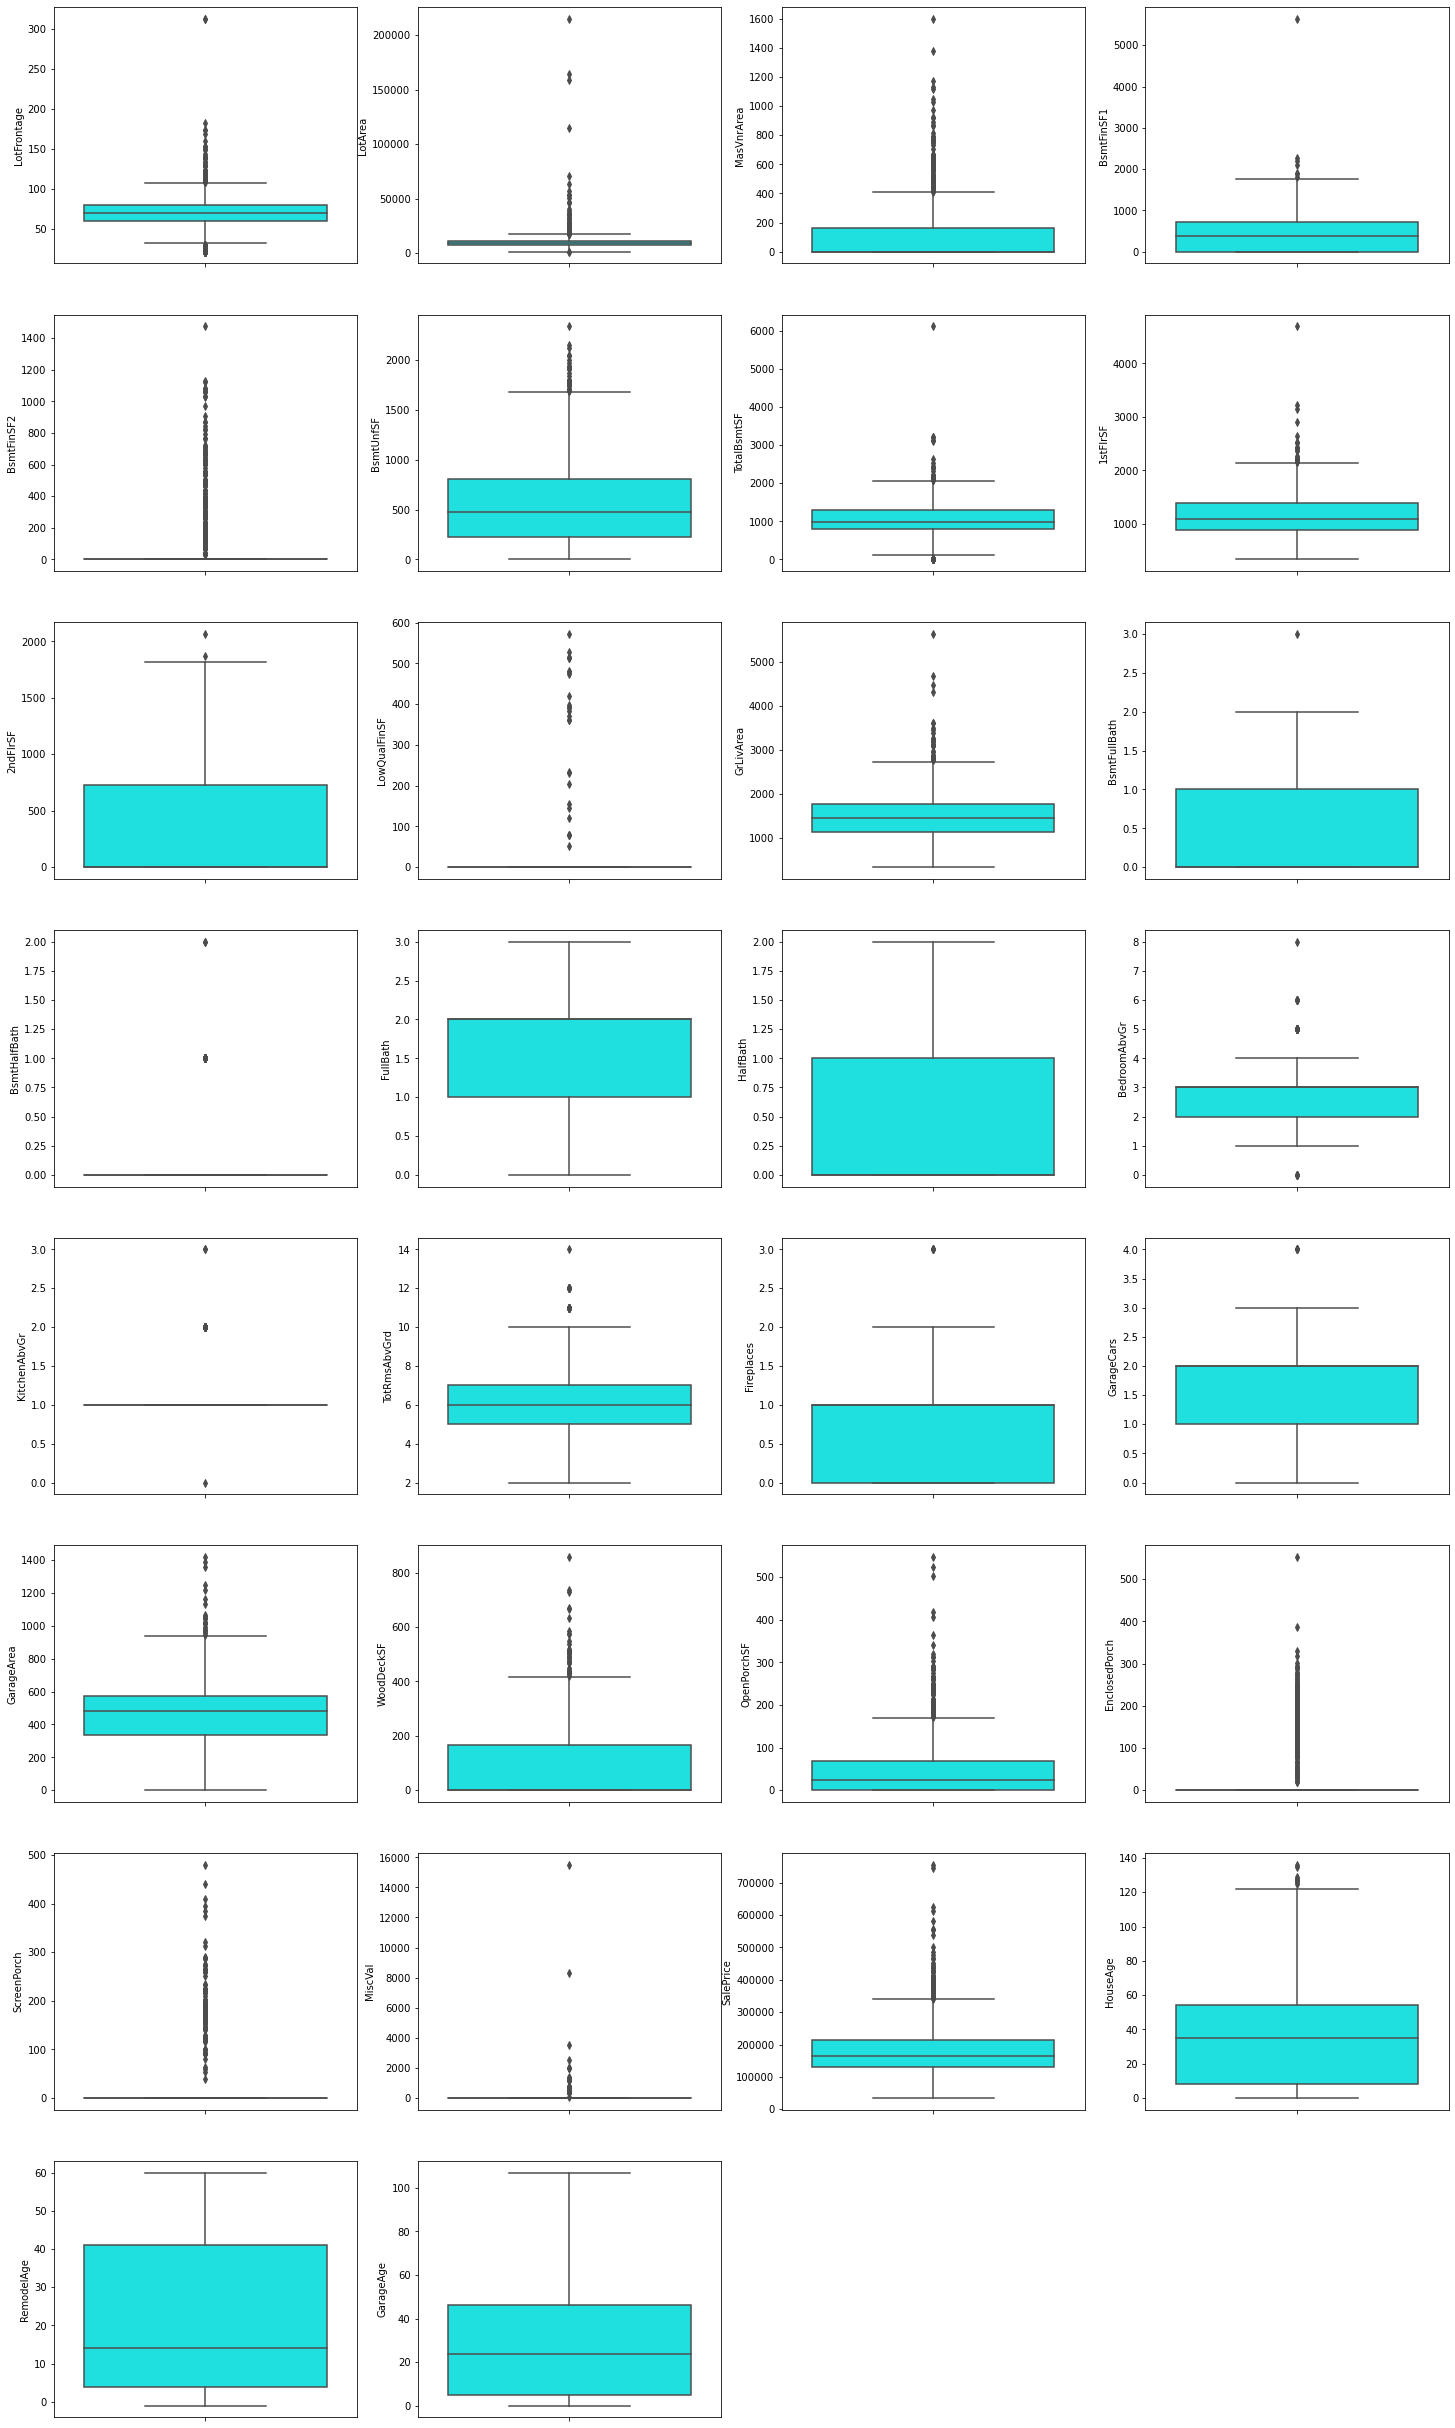

In [33]:
# creating box plot for categorical variable to check outliers present in dataset

def numericalvar(count, feat):
    plt.subplot(9,4,count+1)
    sns.boxplot(y=feat, color = 'cyan', data=SurpriseHousing)
    
    
plt.figure(figsize=(25,50))
for i, col in enumerate(num_var):
    numericalvar(i, col)

## Inference:
- Here we can observer some outliers present in data. most of the data are useful so inplace of removing it reviewing its distribution of few column ,checking its skeweness and try to treat these outliers

In [34]:
# Checking outliers at 25%,50%,75%,90%,95%,98%,99% and above

SurpriseHousing.describe(percentiles=[.25,.5,.75,.90,.95,.98,.99])

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     69.863699   10516.828082   103.117123   443.639726    46.549315   
std      22.027677    9981.264932   180.731373   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      79.000000   11601.500000   164.250000   712.250000     0.000000   
90%      92.000000   14381.700000   335.000000  1065.500000   117.200000   
95%     104.000000   17401.150000   456.000000  1274.000000   396.200000   
98%     120.820000   25251.620000   650.820000  1442.640000   658.120000   
99%     137.410000   37567.640000   791.280000  1572.410000   830.380000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
90%    1232.000000  1602.200000  1680.000000   954.200000      0.000000   
95%    1468.000000  1753.000000  1831.250000  1141.050000      0.000000   
98%    1678.200000  2001.640000  2072.280000  1318.560000      0.000000   
99%    1797.050000  2155.050000  2219.460000  1418.920000    360.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
90%    2158.300000      1.000000      0.000000     2.000000     1.000000   
95%    2466.100000      1.000000      1.000000     2.000000     1.000000   
98%    2782.380000      1.000000      1.000000     3.000000     1.000000   
99%    3123.480000      2.000000      1.000000     3.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014     1.767123   
std        0.815778      0.220338      1.625393     0.644666     0.747315   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000     1.000000   
50%        3.000000      1.000000      6.000000     1.000000     2.000000   
75%        3.000000      1.000000      7.000000     1.000000     2.000000   
90%        4.000000      1.000000      9.000000     1.000000     3.000000   
95%        4.000000      1.000000     10.000000     2.000000     3.000000   
98%        4.000000      2.000000     10.820000     2.000000     3.000000   
99%        5.000000      2.000000     11.000000     2.000000     3.000000   
max        8.000000      3.000000     14.000000     3.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  Enclo

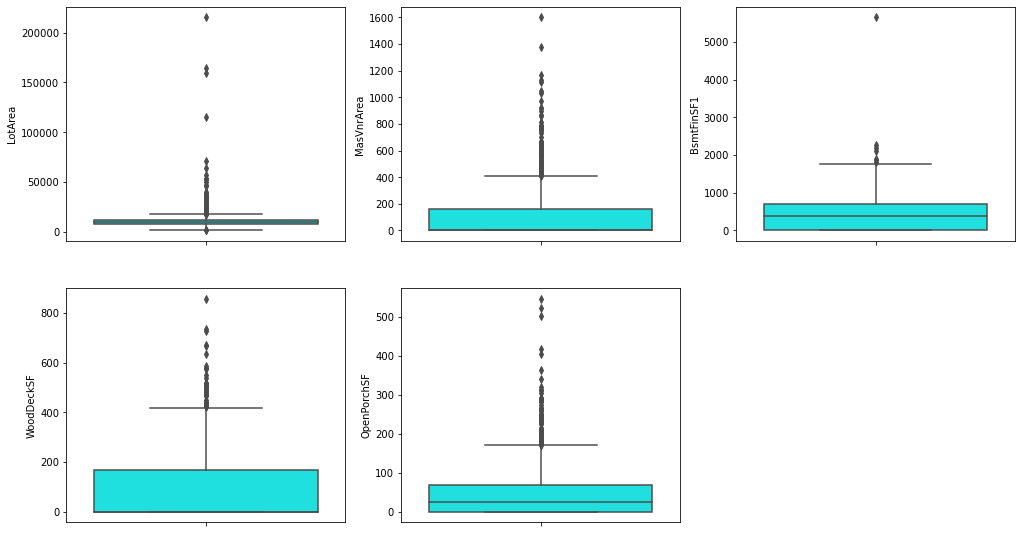

In [35]:
# checking outliers in some important numeric column for outlier treatment

plt.figure(figsize=(17, 25))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', color = 'cyan', data = SurpriseHousing)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', color = 'cyan', data = SurpriseHousing)
plt.subplot(5,3,3)
sns.boxplot(y = 'BsmtFinSF1', color = 'cyan', data = SurpriseHousing)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', color = 'cyan', data = SurpriseHousing)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', color = 'cyan', data = SurpriseHousing)
plt.show()

In [36]:
# Removing Outliers present in numeric variable

# Removing values beyond 98% from variable LotArea and MasVnrArea

LotAreaOutlier = SurpriseHousing['LotArea'].quantile(0.98)
SurpriseHousing = SurpriseHousing[SurpriseHousing["LotArea"] < LotAreaOutlier ]

MasVnrAreaOutlier = SurpriseHousing['MasVnrArea'].quantile(0.98)
SurpriseHousing = SurpriseHousing[SurpriseHousing["MasVnrArea"] < MasVnrAreaOutlier]

# Removing values beyond 99% from variable BsmtFinSF1, WoodDeckSF, OpenPorchSF

BsmtFinSF1Outlier = SurpriseHousing['BsmtFinSF1'].quantile(0.99)
SurpriseHousing = SurpriseHousing[SurpriseHousing['BsmtFinSF1'] < BsmtFinSF1Outlier]

WoodDeckSFOutlier = SurpriseHousing['WoodDeckSF'].quantile(0.99)
SurpriseHousing = SurpriseHousing[SurpriseHousing["WoodDeckSF"] < WoodDeckSFOutlier]

OpenPorchSFOutlier = SurpriseHousing['OpenPorchSF'].quantile(0.99)
SurpriseHousing = SurpriseHousing[SurpriseHousing["OpenPorchSF"] < OpenPorchSFOutlier]

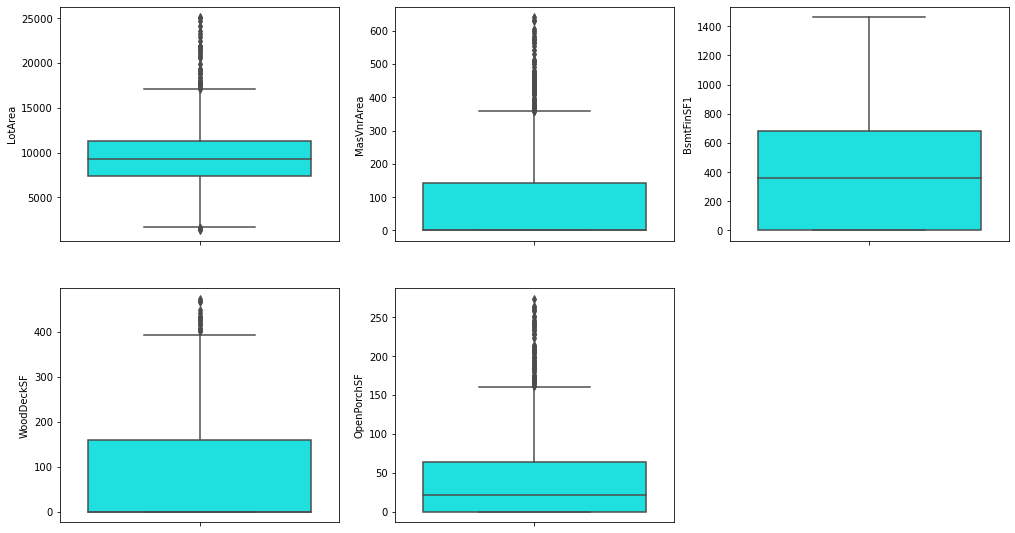

In [37]:
# now checking outliers treatment in all numeric column after outlier treatment

plt.figure(figsize=(17, 25))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', color = 'cyan', data = SurpriseHousing)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', color = 'cyan', data = SurpriseHousing)
plt.subplot(5,3,3)
sns.boxplot(y = 'BsmtFinSF1', color = 'cyan', data = SurpriseHousing)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', color = 'cyan', data = SurpriseHousing)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', color = 'cyan', data = SurpriseHousing)
plt.show()

 ## Inference:
 **Now looks these column outliers treated succesfully**

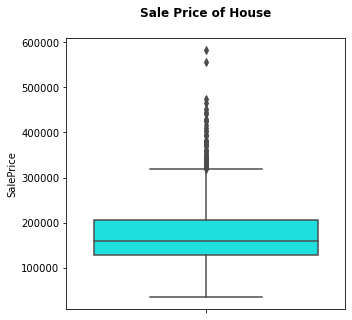

In [38]:
# checking boxplot for identify outliers in the SalePrice (Target) variable

plt.figure(figsize=(5,5))
sns.boxplot(y='SalePrice', color = 'cyan', data = SurpriseHousing)
plt.title('Sale Price of House\n',fontsize=12, fontweight='bold')
plt.show()

## Inference:
 - its clearly shows Outliers/noice  Present in SalePrice column 

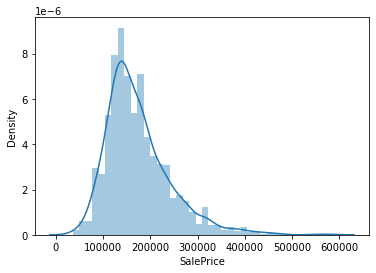

In [39]:
# checking uniformity of target variable SalePrice

sns.distplot(SurpriseHousing['SalePrice'])
plt.show()

## Inference
   - As we can observe its mostly skewed on left side of distribution plot and it has some outliers or noise
   - we will take care it later on during model creation during checking uniformity of target varible 
   - this distribution can be normally centralized and remove noise using `Log Transformation`

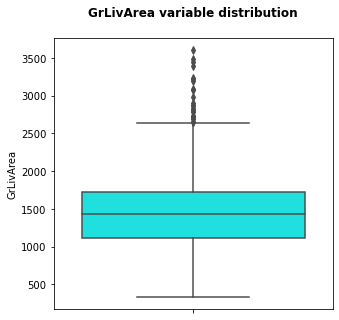

In [40]:
# checking boxplot for identify outliers in the variable GrLivArea: Above grade (ground) living area square feet 

plt.figure(figsize=(5,5))
sns.boxplot(y='GrLivArea', color = 'cyan', data = SurpriseHousing)
plt.title('GrLivArea variable distribution\n',fontsize=12, fontweight='bold')
plt.show()

**Outlier Presnt in GrLivArea**

In [41]:
# Calculating the Iqr (Interquartile range) for treating the outliers of variable GrLivArea
# IQR = Interquartile range (q3-q1)

Q1 = SurpriseHousing.GrLivArea.describe()["25%"]
Q3 = SurpriseHousing.GrLivArea.describe()["75%"]
IQR = (Q3-Q1).round(2)
lower_bound = (Q1 - (1.5*IQR)).round(2)
upper_bound = (Q3 + (1.5*IQR)).round(2)

In [42]:
# Treatment of outliers

# capping
SurpriseHousing.GrLivArea = np.where(SurpriseHousing.GrLivArea>upper_bound,upper_bound,SurpriseHousing.GrLivArea)

# flooring
SurpriseHousing.GrLivArea = np.where(SurpriseHousing.GrLivArea<lower_bound,lower_bound,SurpriseHousing.GrLivArea)

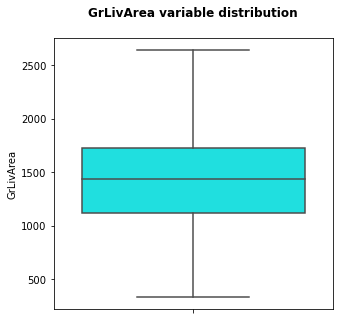

In [43]:
# plotting box plot after handling outliers.

plt.figure(figsize=(5,5))
sns.boxplot(y='GrLivArea',color = 'cyan', data=SurpriseHousing)
plt.title('GrLivArea variable distribution\n',fontsize=12, fontweight='bold')
plt.show()

**Outliers Treated Succesfully**

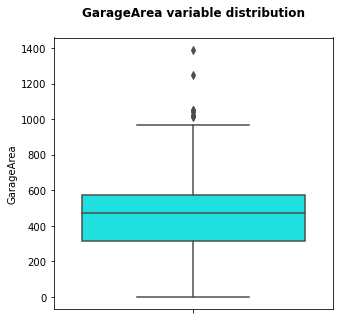

In [44]:
# checking boxplot for identify outliers in the 
# variable GarageArea: Size of garage in square feet 

plt.figure(figsize=(5,5))
sns.boxplot(y='GarageArea', color = 'cyan', data = SurpriseHousing)
plt.title('GarageArea variable distribution\n',fontsize=12, fontweight='bold')
plt.show()

**its clearly show Outlier Present**  

In [45]:
# Calculating the Iqr (Interquartile range) for treating the outliers of variable GarageArea
# IQR = Interquartile range (q3-q1)

Q1 = SurpriseHousing.GarageArea.describe()["25%"]
Q3 = SurpriseHousing.GarageArea.describe()["75%"]
IQR = (Q3-Q1).round(2)
lower_bound = (Q1 - (1.5*IQR)).round(2)
upper_bound = (Q3 + (1.5*IQR)).round(2)

In [46]:
# Treatment of outliers

# capping
SurpriseHousing.GarageArea = np.where(SurpriseHousing.GarageArea>upper_bound,upper_bound,SurpriseHousing.GarageArea)

# flooring
SurpriseHousing.GarageArea = np.where(SurpriseHousing.GarageArea<lower_bound,lower_bound,SurpriseHousing.GarageArea)

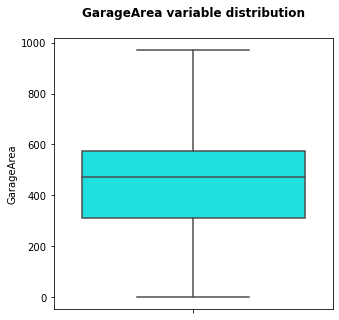

In [47]:
# plotting box plot after handling outliers.

plt.figure(figsize=(5,5))
sns.boxplot(y='GarageArea', color = 'cyan', data = SurpriseHousing)
plt.title('GarageArea variable distribution\n',fontsize=12, fontweight='bold')
plt.show()

**it can show outlier succesfully treated**

In [48]:
# percentage of data retained after outlier treatment

num_data = round(100*(len(SurpriseHousing)/1460),2)
print(num_data)

93.01


#### loss of data after treatment is not much significant


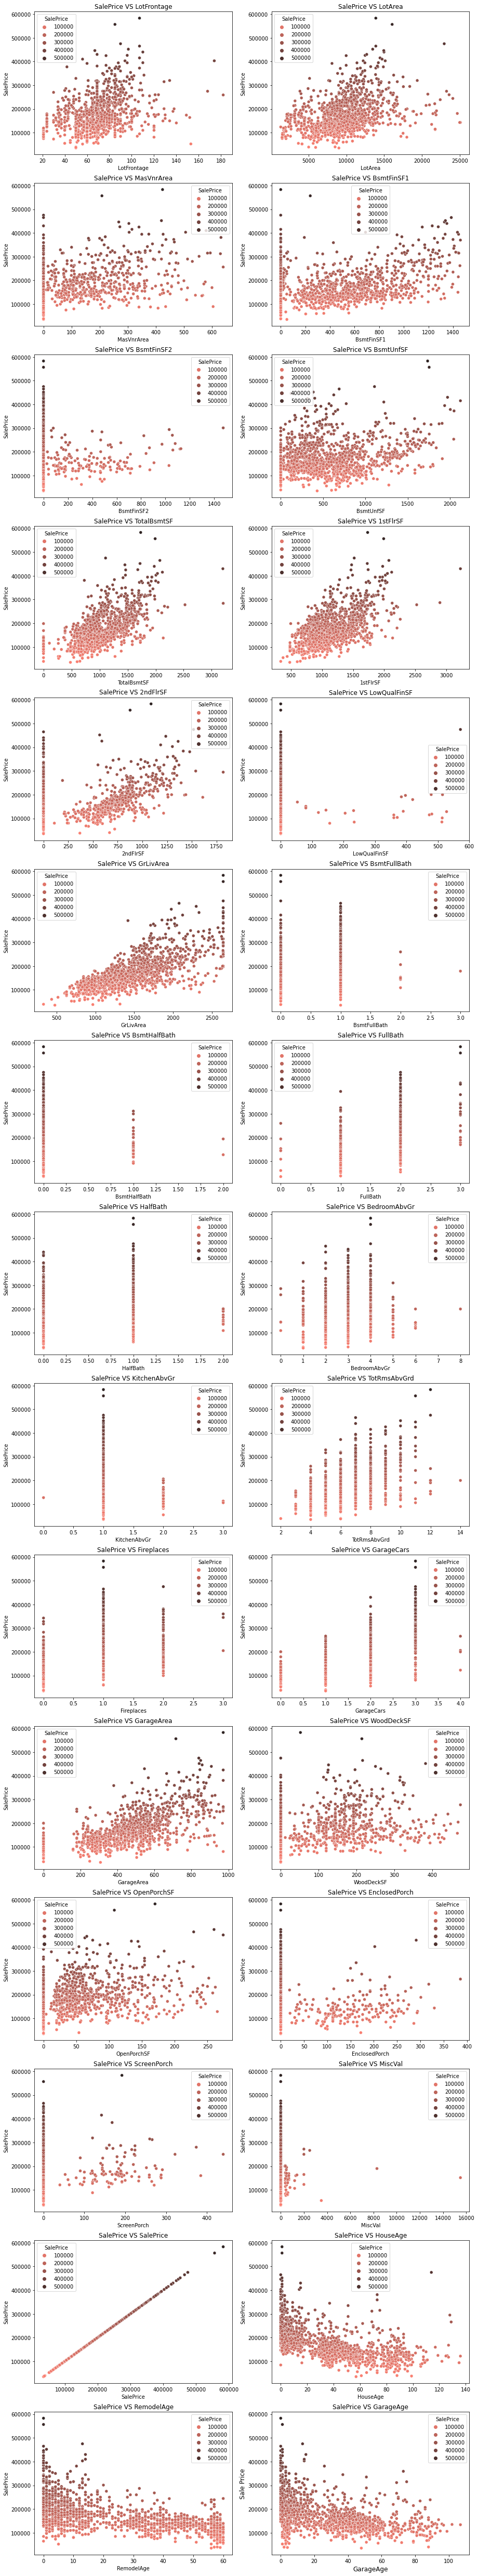

In [49]:
# checking the linear relation between independent and dependent features

SurpriseHousing_num = SurpriseHousing.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(15,2,figsize=(15,90))
for i,ax in zip(SurpriseHousing_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=SurpriseHousing_num,ax=ax,palette='dark:salmon_r')
    plt.xlabel(i,fontsize=12)
   
    plt.ylabel('Sale Price',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

## Inference:
 - its Showing linear relations between Target and independent Variable. increase in independent variable shows increases in target variable value means we can say that its directly proportion to each other.
 - we can use regression model approach and try to find best fit line/equation, which fit all the important independent variable.
 

In [50]:
# Listing list of categorical variable present.

cat_var = SurpriseHousing.select_dtypes(include=['object']).columns
print(cat_var)
print(len(cat_var))

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
38


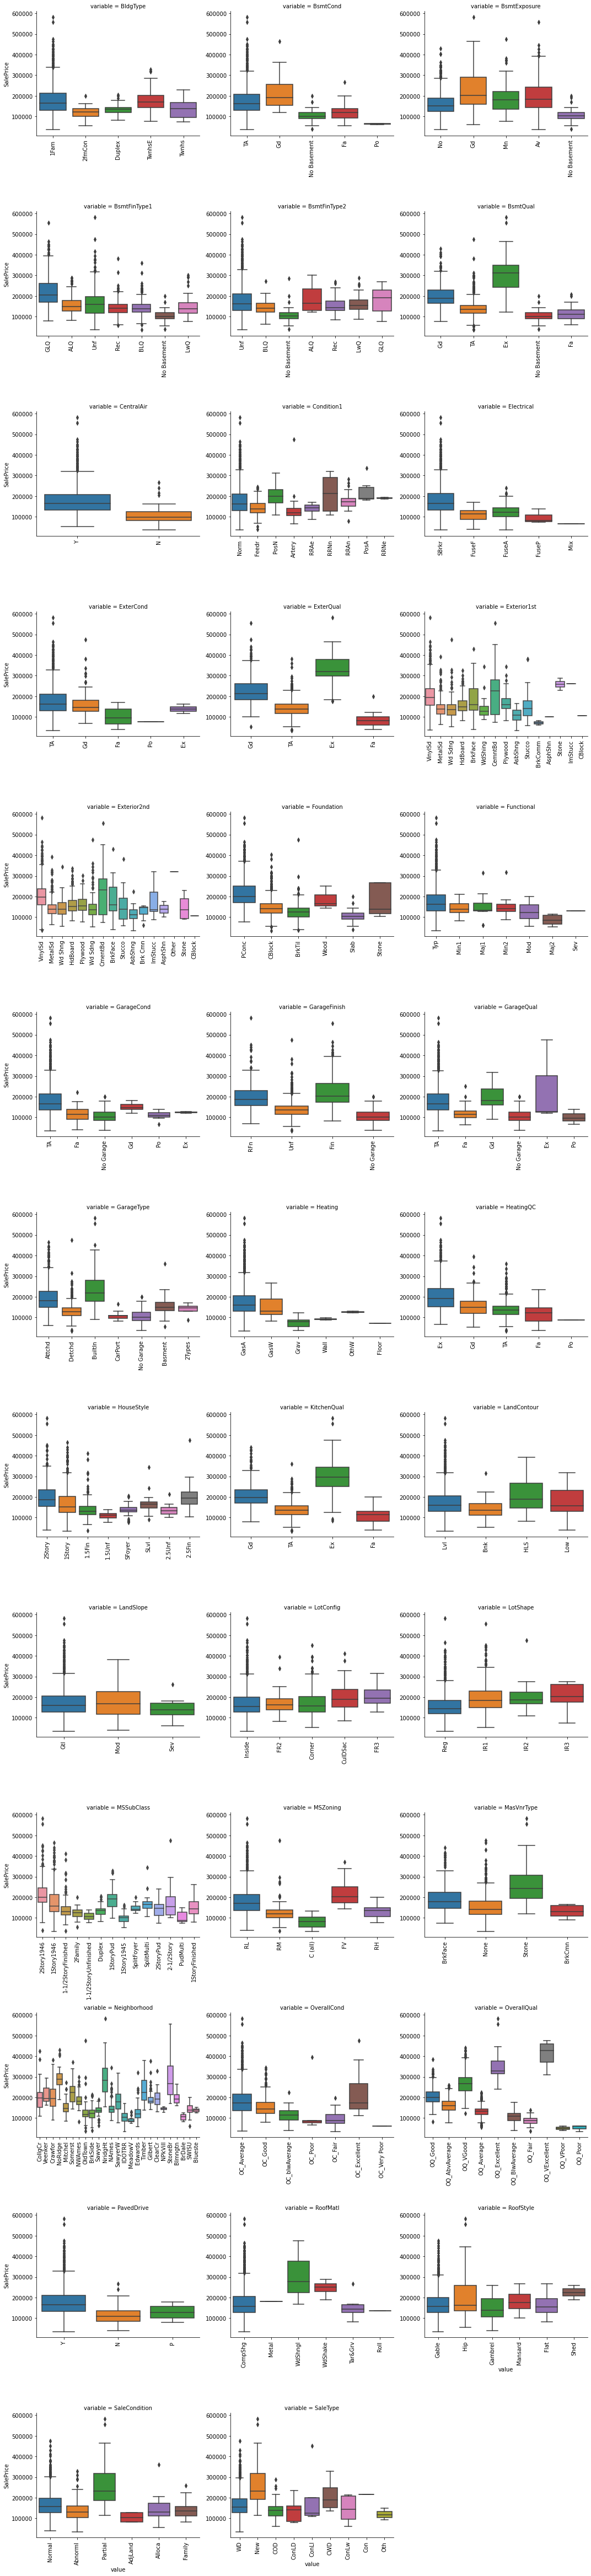

In [51]:
# identifying the relation between categorical/independent features and target variable

def boxplots_categorical(features, sales, **kwargs):
    sns.boxplot(x=features, y=sales)
    x=plt.xticks(rotation=90)
    
categorical_feat = SurpriseHousing.select_dtypes(include=['object'])
plot = pd.melt(SurpriseHousing, id_vars=['SalePrice'], value_vars=sorted(SurpriseHousing[categorical_feat.columns]))
box = sns.FacetGrid(plot, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
box = box.map(boxplots_categorical, "value", "SalePrice")

<function matplotlib.pyplot.show(close=None, block=None)>

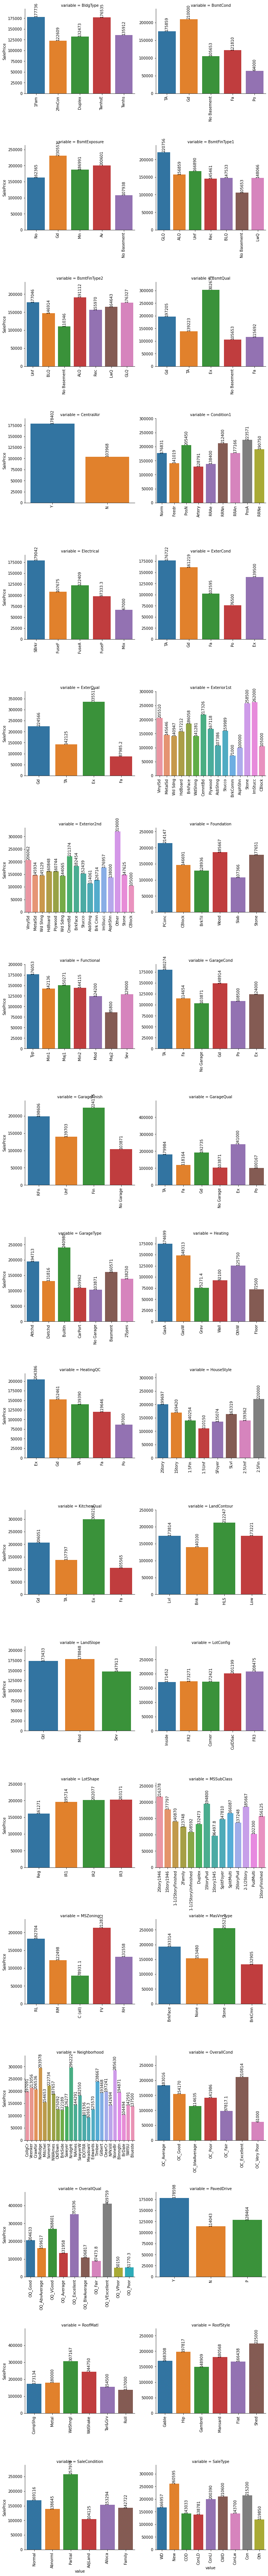

In [52]:
# identifying the relation between categorical/independent features and target variable using bar plot

def barplots_categorical(features, sales, **kwargs):
    ax=sns.barplot(x=features, y=sales, errwidth=0)
    ax.bar_label(ax.containers[0], rotation=90)
    x=plt.xticks(rotation=90)
    
categorical_feat = SurpriseHousing.select_dtypes(include=['object'])
plot = pd.melt(SurpriseHousing, id_vars=['SalePrice'], value_vars=sorted(SurpriseHousing[categorical_feat.columns]))
bar = sns.FacetGrid(plot, col="variable", col_wrap=2, sharex=False, sharey=False, size=5)
bar = bar.map(barplots_categorical, "value", "SalePrice")
plt.show

## Inference: outcome from boxplot and bar plot
 
 - External Quality and External condition with external rating seems to be high price.
 - in external condition TA is very high compared to Ex
 - if Basement condition exposure is good then price may be high
 - House prices increasing according to exterior quality if execellent House price high.
 - Execellent Quality of kitchen garage and heating is also reason of house prise increase
 - new Built houses having high price than old house due to modelling and design.
 - Houses which have central ac available having more price
 - Some of neighbourhood (near) having very high price while no of records are low
    - NoRidge
    - NridgHt
    - Timber
    - StoneBr
 - Lot Config is approx almost same its not much affecting price.
 - Land contur (flatness level) HLS Hillside -Significant slope from side to side seems have high price.
 - slightly irregular (ir1), moderatly irregular(ir2) and irregular (ir3) having higher price than   regular shaped property
 - floating village residential (FV) seems  higher price than Low residential density (RL)
 
  

In [53]:
# correlation matrix for all the numerical variable

corr = SurpriseHousing.select_dtypes(include=['int64','float']).corr()
corr

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage       1.000000  0.572226    0.162902    0.112396    0.033087   
LotArea           0.572226  1.000000    0.104088    0.145290    0.072698   
MasVnrArea        0.162902  0.104088    1.000000    0.189340   -0.052117   
BsmtFinSF1        0.112396  0.145290    0.189340    1.000000   -0.051299   
BsmtFinSF2        0.033087  0.072698   -0.052117   -0.051299    1.000000   
BsmtUnfSF         0.155320  0.107957    0.113346   -0.530673   -0.212455   
TotalBsmtSF       0.300311  0.296800    0.297691    0.404218    0.110707   
1stFlrSF          0.353967  0.399177    0.287580    0.325780    0.101507   
2ndFlrSF          0.047840  0.113158    0.118587   -0.190280   -0.092734   
LowQualFinSF      0.019503  0.025383   -0.076001   -0.075944    0.012056   
GrLivArea         0.311739  0.397075    0.316432    0.068326   -0.007286   
BsmtFullBath      0.035367  0.065952    0.082300    0.646085    0.157086   
BsmtHalfBath     -0.014789  0.034957    0.011340    0.060209    0.066800   
FullBath          0.171224  0.193697    0.236514    0.017783   -0.066037   
HalfBath          0.046807  0.095610    0.173542   -0.021561   -0.028407   
BedroomAbvGr      0.254241  0.289830    0.130102   -0.109309   -0.006617   
KitchenAbvGr      0.007458 -0.004821   -0.016048   -0.091213   -0.039489   
TotRmsAbvGrd      0.306250  0.374556    0.248941   -0.035646   -0.030538   
Fireplaces        0.208123  0.311558    0.225421    0.191910    0.029106   
GarageCars        0.278439  0.265570    0.338420    0.175810   -0.034280   
GarageArea        0.309024  0.301101    0.340169    0.218511   -0.003527   
WoodDeckSF        0.073520  0.136031    0.120166    0.183198    0.085554   
OpenPorchSF       0.140895  0.141831    0.163243    0.074239    0.001956   
EnclosedPorch    -0.004859  0.000482   -0.108702   -0.108620    0.039743   
ScreenPorch       0.063072  0.105872    0.067914    0.052309    0.056021   
MiscVal           0.004794  0.062589   -0.027756    0.010442    0.005241   
SalePrice         0.353834  0.389085    0.400795    0.328849   -0.013794   
HouseAge         -0.122681 -0.058739   -0.299066   -0.233593    0.041671   
RemodelAge       -0.066549 -0.042384   -0.138522   -0.108932    0.066119   
GarageAge        -0.049540  0.017828   -0.181745   -0.102670    0.081086   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
LotFrontage     0.155320     0.300311  0.353967  0.047840      0.019503   
LotArea         0.107957     0.296800  0.399177  0.113158      0.025383   
MasVnrArea      0.113346     0.297691  0.287580  0.118587     -0.076001   
BsmtFinSF1     -0.530673     0.404218  0.325780 -0.190280     -0.075944   
BsmtFinSF2     -0.212455     0.110707  0.101507 -0.092734      0.012056   
BsmtUnfSF       1.000000     0.489686  0.367945 -0.020751      0.035096   
TotalBsmtSF     0.489686     1.000000  0.781105 -0.253391     -0.033236   
1stFlrSF        0.367945     0.781105  1.000000 -0.277569     -0.009167   
2ndFlrSF       -0.020751    -0.253391 -0.277569  1.000000      0.059247   
LowQualFinSF    0.035096    -0.033236 -0.009167  0.059247      1.000000   
GrLivArea       0.258330     0.354131  0.490816  0.691034      0.114478   
BsmtFullBath   -0.408148     0.264435  0.189515 -0.173870     -0.052580   
BsmtHalfBath   -0.091333    -0.013872 -0.008414 -0.031238     -0.028408   
FullBath        0.287991     0.312362  0.371370  0.392779     -0.001111   
HalfBath       -0.056676    -0.096350 -0.165883  0.618486     -0.021999   
BedroomAbvGr    0.166258     0.071469  0.151090  0.491374      0.106229   
KitchenAbvGr    0.029102    -0.076002  0.078140  0.071880      0.008378   
TotRmsAbvGrd    0.251515     0.231660  0.375027  0.604052      0.144736   
Fireplaces      0.060843     0.274277  0.356487  0.187219     -0.019488   
GarageCars      0.229224     0.420102  0.417542  0.167267     -0.097130   
GarageArea      0.202170     0.445626  0.447177  0.120358     -0.076696   
WoodDeck

In [54]:
# checking numerical data type (int64 and float) information

SurpriseHousing.select_dtypes(include=['int64','float']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1358 non-null   float64
 1   LotArea        1358 non-null   int64  
 2   MasVnrArea     1358 non-null   float64
 3   BsmtFinSF1     1358 non-null   int64  
 4   BsmtFinSF2     1358 non-null   int64  
 5   BsmtUnfSF      1358 non-null   int64  
 6   TotalBsmtSF    1358 non-null   int64  
 7   1stFlrSF       1358 non-null   int64  
 8   2ndFlrSF       1358 non-null   int64  
 9   LowQualFinSF   1358 non-null   int64  
 10  GrLivArea      1358 non-null   float64
 11  BsmtFullBath   1358 non-null   int64  
 12  BsmtHalfBath   1358 non-null   int64  
 13  FullBath       1358 non-null   int64  
 14  HalfBath       1358 non-null   int64  
 15  BedroomAbvGr   1358 non-null   int64  
 16  KitchenAbvGr   1358 non-null   int64  
 17  TotRmsAbvGrd   1358 non-null   int64  
 18  Fireplac

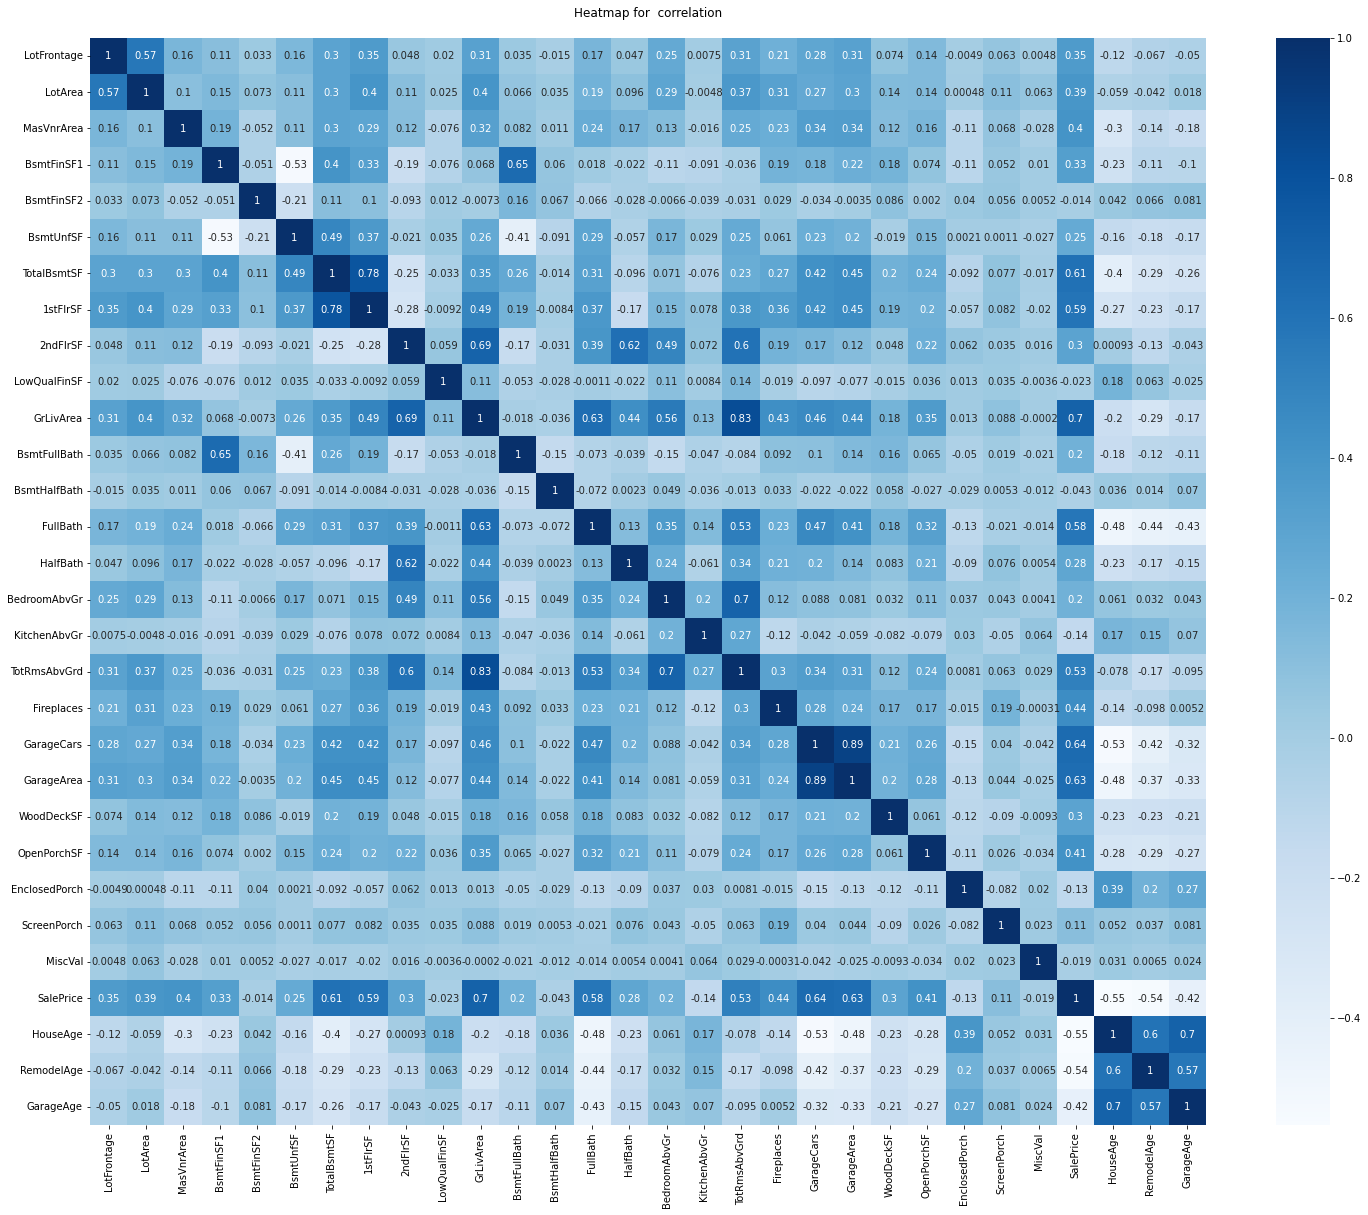

In [55]:
# Plotting Heat Map
plt.figure(figsize = (25, 20)) 
sns.heatmap(SurpriseHousing.corr(), annot = True, annot_kws={"size": 10}, cmap='Blues')
plt.title("Heatmap for  correlation\n")
plt.show()

### Inference
   
   - few features showing very high correlation more than 80 percent  
   - GarageCars and GarageArea have correlation coff 0.89
   - TotRmsAbvGrd and GrLivArea have correlation coff 0.83
   - Removing such column which show high correlation
   - any one of the varible from these can be dropped
   - HouseAge GarageAge and RemodelAge showing good correlation within themselves.

In [56]:
# Dropping 'GarageCars', 'TotRmsAbvGrd' as their corr. with sale price is high

SurpriseHousing.drop(['GarageCars', 'TotRmsAbvGrd'], axis = 1, inplace=True)

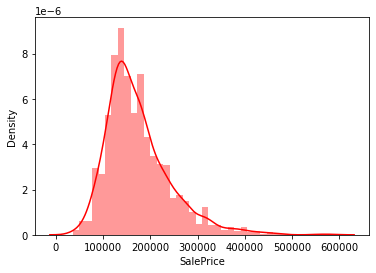

In [57]:
# checking uniformity of target variable SalePrice

sns.distplot(SurpriseHousing['SalePrice'],color='r')
plt.show()

### Inference
 - As we can observe its mostly skewed on left side of distribution plot and it has some outliers or noise
 - we will take care it later on during model creation during checking uniformity of target varible
 - this distribution can be normally centralized and remove noise using `Log Transformation`

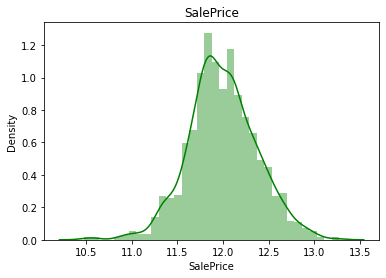

In [58]:
# log transformation of sale price 

SurpriseHousing['SalePrice'] = np.log1p(SurpriseHousing['SalePrice'])

plt.title('SalePrice')
sns.distplot(SurpriseHousing['SalePrice'], color='g')
plt.show()

**Now we can see its normally distributed**

## Data Prepration for model building
   - converting categorical data in to numerical data
   - Creating dummy variable

In [59]:
# listing categorical variable

cat_var = SurpriseHousing.select_dtypes(include=['object']).columns
print(cat_var)
print(len(cat_var))

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
38


In [60]:
# converting CentralAir  Y with 1 and N with 0 as per data description

SurpriseHousing.CentralAir = SurpriseHousing.CentralAir.map({'Y':1, 'N':0})

In [61]:
# checking shape number of rows and columns present in dataset

SurpriseHousing.shape

(1358, 66)

In [62]:
# selecting categorical columon for creating dummies

SurpriseHousing_categ = SurpriseHousing.select_dtypes(include=['object'])
SurpriseHousing_categ.head()
SurpriseHousing_categ.shape

(1358, 37)

In [63]:
# Creating dummy variables  converting categorical in to dummy variable

SurpriseHousing_dummies = pd.get_dummies(SurpriseHousing_categ, drop_first=True)
SurpriseHousing_dummies.head()

MSSubClass_1-1/2StoryUnfinished  MSSubClass_1Story1945  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                0                      0   
4                                0                      0   

   MSSubClass_1Story1946  MSSubClass_1StoryFinished  MSSubClass_1StoryPud  \
0                      0                          0                     0   
1                      1                          0                     0   
2                      0                          0                     0   
3                      0                          0                     0   
4                      0                          0                     0   

   MSSubClass_2-1/2Story  MSSubClass_2Family  MSSubClass_2Story1946  \
0                      0                   0                      1   
1                      0                   0                      0   
2                      0                   0                      1   
3                      0                   0                      1   
4                      0                   0                      1   

   MSSubClass_2StoryPud  MSSubClass_Duplex  MSSubClass_PudMulti  \
0                     0                  0                    0   
1                     0                  0                    0   
2                     0                  0                    0   
3                     0                  0                    0   
4                     0                  0                    0   

   MSSubClass_SplitFoyer  MSSubClass_SplitMulti  MSZoning_FV  MSZoning_RH  \
0                      0                      0            0            0   
1                      0                      0            0            0   
2                      0                      0            0            0   
3                      0                      0            0            0   
4                      0                      0            0            0   

   MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0            1            0             0             0             1   
1            1            0             0             0             1   
2            1            0             0             0             0   
3            1            0             0             0             0   
4            1            0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0                0                0                1                  0   
1                0                0                1                  0   
2                0                0                1                  0   
3                0                0                1                  0   
4                0                0                1                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0              0              0                 1              0   
1              1              0                 0              0   
2              0              0                 1              0   
3              0              0                 0              0   
4              1              0                 0              0   

   LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                     0                    0   
1              0                     0                    0   
2              0                     0                    0   
3              0                     0                    0   
4              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0               

In [64]:
# checking shape number of rows and columns present in dataset

SurpriseHousing_dummies.shape

(1358, 221)

In [65]:
# deleting orignal column variable after dummy created

SurpriseHousing = SurpriseHousing.drop(list(SurpriseHousing_categ.columns), axis=1)

In [66]:
# checking shape number of rows and columns present in dataset

SurpriseHousing.shape

(1358, 29)

In [67]:
# Adding these dummy variable datasets to orignal dataset using concat

SurpriseHousing = pd.concat([SurpriseHousing, SurpriseHousing_dummies], axis=1)
SurpriseHousing.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          856           1       856       854             0     1710.0   
1         1262           1      1262         0             0     1262.0   
2          920           1       920       866             0     1786.0   
3          756           1       961       756             0     1717.0   
4         1145           1      1145      1053             0     2198.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           0       548.0           0           61              0   
1           1       460.0         298            0              0   
2           1       608.0           0           42              0   
3           1       642.0           0           35            272   
4           1       836.0         192           84              0   

   ScreenPorch  MiscVal  SalePrice  HouseAge  RemodelAge  GarageAge  \
0            0        0  12.247699         5           5          5   
1            0        0  12.109016        31          31         31   
2            0        0  12.317171         7           6          7   
3            0        0  11.849405        91          36          8   
4            0        0  12.429220         8           8          8   

   MSSubClass_1-1/2StoryUnfinished  MSSubClass_1Story1945  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                0                      0   
4                                0                      0   

   MSSubClass_1Story1946  MSSubClass_1StoryFinished  MSSubClass_1StoryPud  \
0                      0                          0                     0   
1                      1                          0                     0   
2                      0                          0                     0   
3                      0                          0                     0   
4                      0                          0                     0   

   MSSubClass_2-1/2Story  MSSubClass_2Family  MSSubClass_2Story1946  \
0                      0                   0                      1   
1                      0                   0                      0   
2                      0                   0                      1   
3                      0                   0                      1   
4                      0                   0                      1   

   MSSubClass_2StoryPud  MSSubClass_Duplex  MSSubClass_PudMulti  \
0                     0                  0                    0   
1                     0                  0                    0   
2                     0                  0                    0   
3                     0                  0                    0   
4                     0                  0                    0   

   MSSubClass_SplitFoyer  MSSubClass_SplitMulti  MSZoning_FV  MSZoning_RH  \
0                      0                 

In [68]:
# checking shape number of rows and columns present in dataset

SurpriseHousing.shape

(1358, 250)

## Splitting Dataset in to Train set and Test set 

In [69]:
y = SurpriseHousing.pop('SalePrice')
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [70]:
X = SurpriseHousing
X.shape

(1358, 249)

In [71]:
# importing required library for spliting train set and test set

import sklearn
from sklearn.model_selection import train_test_split

# Splitting the data into train set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# displaying shape of train set and test set

print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (909, 249)
X_test shape (449, 249)
y_train shape (909,)
y_test shape (449,)


In [72]:
# Displaying Top 5 Row of X_train of Train dataset

X_train.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
867          85.0     6970         0.0         932           0        108   
496          69.0    12692         0.0        1231           0       1969   
932          84.0    11670       302.0           0           0       1905   
1355        102.0    10192       143.0           0           0        570   
913          82.0     6270         0.0         284           0        717   

      TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
867          1040           1      1120         0             0     1120.0   
496          3200           1      3228         0             0     2643.0   
932          1905           1      1905         0             0     1905.0   
1355          570           1      1222       698             0     1920.0   
913          1001           0      1001      1001             0     2002.0   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
867              1             0         1         1             3   
496              1             0         3         0             4   
932              0             0         2         0             3   
1355             0             0         3         0             4   
913              0             0         2         0             4   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
867              1           0       544.0         168            0   
496              1           1       546.0         264           75   
932              1           1       788.0           0          191   
1355             1           1       487.0           0           98   
913              2           0       871.0           0            0   

      EnclosedPorch  ScreenPorch  MiscVal  HouseAge  RemodelAge  GarageAge  \
867               0            0      400        46          46         46   
496             291            0        0        15          14         15   
932               0            0        0         1           1          1   
1355              0            0        0        38          14         38   
913               0            0        0        58          57         58   

      MSSubClass_1-1/2StoryUnfinished  MSSubClass_1Story1945  \
867                                 0                      0   
496                                 0                      0   
932                                 0                      0   
1355                                0                      0   
913                                 0                      0   

      MSSubClass_1Story1946  MSSubClass_1StoryFinished  MSSubClass_1StoryPud  \
867                       1                          0                     0   
496                       1                          0                     0   
932                       1                          0                     0   
1355                      0                          0                     0   
913                       0                          0                     0   

      MSSubClass_2-1/2Story  MSSubClass_2Family  MSSubClass_2Story1946  \
867                       0                   0                      0   
496                       0                   0                      0   
932                       0                   0                      0   
1355                      0                   0                      0   
913                       0                   0                      0   

      MSSubClass_2StoryPud  MSSubClass_Duplex  MSSubClass_PudMulti  \
867                      0                  0                    0   
496                      0                  0                    0   
932                      0                  0                    0   
1355                     0                  0                    0   
913                      0                  1                    0   

      MSSubClass_SplitFoy

In [73]:
# Displaying Top 5 Row of y_train of Train dataset

y_train.head()

867     11.767575
496     12.971543
932     12.676079
1355    12.043560
913     11.884496
Name: SalePrice, dtype: float64

In [74]:
# Displaying Top 5 Row of X_test of Test dataset

X_test.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
52          110.0     8472         0.0         104         712          0   
1179         77.0     8335         0.0           0           0          0   
1409         46.0    20544       123.0           0           0        791   
556          69.0    14850         0.0         895           0        197   
1000         74.0    10206         0.0           0           0          0   

      TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
52            816           0       816         0             0      816.0   
1179            0           1      1124         0             0     1124.0   
1409          791           1      1236       857             0     2093.0   
556          1092           1      1092         0             0     1092.0   
1000            0           0       944         0             0      944.0   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
52               1             0         1         0             2   
1179             0             0         1         0             3   
1409             0             0         2         1             3   
556              1             0         1         0             2   
1000             0             0         1         0             2   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
52               1           0       516.0         106            0   
1179             1           1         0.0           0           36   
1409             1           1       542.0         364           63   
556              1           1       299.0         268            0   
1000             1           0       528.0           0            0   

      EnclosedPorch  ScreenPorch  MiscVal  HouseAge  RemodelAge  GarageAge  \
52                0            0        0        47          47         47   
1179            190            0        0        52          52          1   
1409              0            0        0        22          17         22   
556               0          122        0        49          49         49   
1000              0            0        0        57          57         53   

      MSSubClass_1-1/2StoryUnfinished  MSSubClass_1Story1945  \
52                                  0                      0   
1179                                0                      0   
1409                                0                      0   
556                                 0                      0   
1000                                0                      0   

      MSSubClass_1Story1946  MSSubClass_1StoryFinished  MSSubClass_1StoryPud  \
52                        0                          0                     0   
1179                      1                          0                     0   
1409                      0                          0                     0   
556                       1                          0                     0   
1000                      1                          0                     0   

      MSSubClass_2-1/2Story  MSSubClass_2Family  MSSubClass_2Story1946  \
52                        0                   0                      0   
1179                      0                   0                      0   
1409                      0                   0                      1   
556                       0                   0                      0   
1000                      0                   0                      0   

      MSSubClass_2StoryPud  MSSubClass_Duplex  MSSubClass_PudMulti  \
52                       0                  1                    0   
1179                     0                  0                    0   
1409                     0                  0                    0   
556                      0                  0                    0   
1000                     0                  0                    0   

      MSSubClass_SplitFoy

In [75]:
# Displaying Top 5 Row of y_test of Test dataset

y_test.head()

52      11.608245
1179    11.440366
1409    12.278398
556     11.856522
1000    11.314487
Name: SalePrice, dtype: float64

In [76]:
# listing out all possible datatype of numerical value

num_var = X_train.select_dtypes(include=['int64','int32','float64','float32']).columns
print(num_var)
print(len(num_var))

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal',
       'HouseAge', 'RemodelAge', 'GarageAge'],
      dtype='object')
28


In [77]:
# displaying top 5 row of  X_train containg numerical variable

X_train[num_var].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
867          85.0     6970         0.0         932           0        108   
496          69.0    12692         0.0        1231           0       1969   
932          84.0    11670       302.0           0           0       1905   
1355        102.0    10192       143.0           0           0        570   
913          82.0     6270         0.0         284           0        717   

      TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
867          1040           1      1120         0             0     1120.0   
496          3200           1      3228         0             0     2643.0   
932          1905           1      1905         0             0     1905.0   
1355          570           1      1222       698             0     1920.0   
913          1001           0      1001      1001             0     2002.0   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
867              1             0         1         1             3   
496              1             0         3         0             4   
932              0             0         2         0             3   
1355             0             0         3         0             4   
913              0             0         2         0             4   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
867              1           0       544.0         168            0   
496              1           1       546.0         264           75   
932              1           1       788.0           0          191   
1355             1           1       487.0           0           98   
913              2           0       871.0           0            0   

      EnclosedPorch  ScreenPorch  MiscVal  HouseAge  RemodelAge  GarageAge  
867               0            0      400        46          46         46  
496             291            0        0        15          14         15  
932               0            0        0         1           1          1  
1355              0            0        0        38          14         38  
913               0            0        0        58          57         58

In [78]:
# Displaying statistical data of X_train dataset

X_train.describe()

LotFrontage       LotArea  MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count   909.000000    909.000000  909.000000   909.000000   909.000000   
mean     68.864686   9397.103410   81.871287   401.643564    45.755776   
std      19.080584   3655.175858  132.798355   400.791456   162.045263   
min      21.000000   1526.000000    0.000000     0.000000     0.000000   
25%      60.000000   7244.000000    0.000000     0.000000     0.000000   
50%      69.000000   9204.000000    0.000000   340.000000     0.000000   
75%      79.000000  11250.000000  137.000000   685.000000     0.000000   
max     174.000000  25095.000000  640.000000  1456.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF  CentralAir     1stFlrSF     2ndFlrSF  \
count   909.000000   909.000000  909.000000   909.000000   909.000000   
mean    571.975798  1019.375138    0.928493  1129.221122   325.434543   
std     432.565056   402.752374    0.257812   353.392078   416.547250   
min       0.000000     0.000000    0.000000   334.000000     0.000000   
25%     245.000000   783.000000    1.000000   864.000000     0.000000   
50%     491.000000   967.000000    1.000000  1069.000000     0.000000   
75%     806.000000  1253.000000    1.000000  1340.000000   698.000000   
max    2046.000000  3206.000000    1.000000  3228.000000  1540.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count    909.000000   909.000000    909.000000    909.000000  909.000000   
mean       6.134213  1453.584158      0.394939      0.056106    1.550055   
std       50.560619   448.611736      0.506800      0.230252    0.536111   
min        0.000000   334.000000      0.000000      0.000000    0.000000   
25%        0.000000  1111.000000      0.000000      0.000000    1.000000   
50%        0.000000  1416.000000      0.000000      0.000000    2.000000   
75%        0.000000  1710.000000      1.000000      0.000000    2.000000   
max      572.000000  2643.000000      3.000000      1.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  \
count  909.000000    909.000000    909.000000  909.000000  909.000000   
mean     0.371837      2.828383      1.049505    0.565457  459.752475   
std      0.499249      0.801449      0.226961    0.614935  208.203770   
min      0.000000      0.000000      1.000000    0.000000    0.000000   
25%      0.000000      2.000000      1.000000    0.000000  312.000000   
50%      0.000000      3.000000      1.000000    1.000000  463.000000   
75%      1.000000      3.000000      1.000000    1.000000  575.000000   
max      2.000000      8.000000      3.000000    3.000000  972.000000   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch      MiscVal  \
count  909.000000   909.000000     909.000000   909.000000   909.000000   
mean    81.849285    41.742574      22.498350    13.613861    34.118812   
std    109.677011    55.727307      60.534943    50.378102   329.869743   
min      0.000000     0.000000       0.000000     0.000000     0.000000   
25%      0.000000     0.000000       0.000000     0.000000     0.000000   
50%      0.000000    22.000000       0.000000     0.000000     0.000000   
75%    156.000000    64.000000       0.000000     0.000000     0.000000   
max    474.000000   262.000000     386.000000   410.000000  8300.000000   

         HouseAge  RemodelAge   GarageAge  MSSubClass_1-1/2StoryUnfinished  \
count  909.000000   909.00000  909.000000                       909.000000   
mean    37.030803    23.49615   27.761276                         0.011001   
std     30.445574    21.04676   24.705873                         0.104365   
min      0.000000     0.00000    0.000000                         0.000000   
25%      7.000000     4.00000    5.000000                         0.000000   
50%     36.000000    14.00000   24.000000                         0.000000   
75%     56.000000    42.00000   46.000000                         0.000000   
max    136.000000    60.00000  102.0000

In [79]:
# Displaying Top 5 rows of X_train data set

X_train.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
867          85.0     6970         0.0         932           0        108   
496          69.0    12692         0.0        1231           0       1969   
932          84.0    11670       302.0           0           0       1905   
1355        102.0    10192       143.0           0           0        570   
913          82.0     6270         0.0         284           0        717   

      TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
867          1040           1      1120         0             0     1120.0   
496          3200           1      3228         0             0     2643.0   
932          1905           1      1905         0             0     1905.0   
1355          570           1      1222       698             0     1920.0   
913          1001           0      1001      1001             0     2002.0   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
867              1             0         1         1             3   
496              1             0         3         0             4   
932              0             0         2         0             3   
1355             0             0         3         0             4   
913              0             0         2         0             4   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
867              1           0       544.0         168            0   
496              1           1       546.0         264           75   
932              1           1       788.0           0          191   
1355             1           1       487.0           0           98   
913              2           0       871.0           0            0   

      EnclosedPorch  ScreenPorch  MiscVal  HouseAge  RemodelAge  GarageAge  \
867               0            0      400        46          46         46   
496             291            0        0        15          14         15   
932               0            0        0         1           1          1   
1355              0            0        0        38          14         38   
913               0            0        0        58          57         58   

      MSSubClass_1-1/2StoryUnfinished  MSSubClass_1Story1945  \
867                                 0                      0   
496                                 0                      0   
932                                 0                      0   
1355                                0                      0   
913                                 0                      0   

      MSSubClass_1Story1946  MSSubClass_1StoryFinished  MSSubClass_1StoryPud  \
867                       1                          0                     0   
496                       1                          0                     0   
932                       1                          0                     0   
1355                      0                          0                     0   
913                       0                          0                     0   

      MSSubClass_2-1/2Story  MSSubClass_2Family  MSSubClass_2Story1946  \
867                       0                   0                      0   
496                       0                   0                      0   
932                       0                   0                      0   
1355                      0                   0                      0   
913                       0                   0                      0   

      MSSubClass_2StoryPud  MSSubClass_Duplex  MSSubClass_PudMulti  \
867                      0                  0                    0   
496                      0                  0                    0   
932                      0                  0                    0   
1355                     0                  0                    0   
913                      0                  1                    0   

      MSSubClass_SplitFoy

## rescalling of features
 
 - here i am using Min-Max scalling it will scale data between 0 and 1
 -  in multiple linear regression we need to scalling the variable, by which their cofficient will be comparable when we will build model.
  ### Technique of scalling:
 - Min-Max Scaling (normalization) : scale data between 0 and 1.
 - Standardization ( mean - 0, sigma - 1)
 ### Advantages of Rescaling:

 - Interpretability of data and models becomes easier
 - Data processing will become faster for large dataset , models can  built in relatively short time.
 
 - Here i am using Min-Max Scaling.

 ### Formula for Min-Max scaling:

`normalization: (x - x_min)/(x_max - x_min)`

In [80]:
# Importing Library for Min-Max Scaling
    
from sklearn.preprocessing import MinMaxScaler

# instantiating an object for scaling

scaler = MinMaxScaler()

In [81]:
# scaling the train data using fit_transform and test data using transform

X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_test[num_var] = scaler.transform(X_test[num_var])

In [82]:
# Displaying Top 5 Row of X_train data

X_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
867      0.418301  0.230981    0.000000    0.640110         0.0   0.052786   
496      0.313725  0.473758    0.000000    0.845467         0.0   0.962366   
932      0.411765  0.430396    0.471875    0.000000         0.0   0.931085   
1355     0.529412  0.367686    0.223438    0.000000         0.0   0.278592   
913      0.398693  0.201281    0.000000    0.195055         0.0   0.350440   

      TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
867      0.324392         1.0  0.271596  0.000000           0.0   0.340407   
496      0.998129         1.0  1.000000  0.000000           0.0   1.000000   
932      0.594198         1.0  0.542847  0.000000           0.0   0.680381   
1355     0.177792         1.0  0.306842  0.453247           0.0   0.686877   
913      0.312227         0.0  0.230477  0.650000           0.0   0.722391   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
867       0.333333           0.0  0.333333       0.5         0.375   
496       0.333333           0.0  1.000000       0.0         0.500   
932       0.000000           0.0  0.666667       0.0         0.375   
1355      0.000000           0.0  1.000000       0.0         0.500   
913       0.000000           0.0  0.666667       0.0         0.500   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
867            0.0    0.000000    0.559671    0.354430     0.000000   
496            0.0    0.333333    0.561728    0.556962     0.286260   
932            0.0    0.333333    0.810700    0.000000     0.729008   
1355           0.0    0.333333    0.501029    0.000000     0.374046   
913            0.5    0.000000    0.896091    0.000000     0.000000   

      EnclosedPorch  ScreenPorch   MiscVal  HouseAge  RemodelAge  GarageAge  \
867        0.000000          0.0  0.048193  0.338235    0.766667   0.450980   
496        0.753886          0.0  0.000000  0.110294    0.233333   0.147059   
932        0.000000          0.0  0.000000  0.007353    0.016667   0.009804   
1355       0.000000          0.0  0.000000  0.279412    0.233333   0.372549   
913        0.000000          0.0  0.000000  0.426471    0.950000   0.568627   

      MSSubClass_1-1/2StoryUnfinished  MSSubClass_1Story1945  \
867                                 0                      0   
496                                 0                      0   
932                                 0                      0   
1355                                0                      0   
913                                 0                      0   

      MSSubClass_1Story1946  MSSubClass_1StoryFinished  MSSubClass_1StoryPud  \
867                       1                          0                     0   
496                       1                          0                     0   
932                       1                          0                     0   
1355                      0                          0                     0   
913                       0                          0                     0   

      MSSubClass_2-1/2Story  MSSubClass_2Family  MSSubClass_2Story1946  \
867                       0                   0                      0   
496                       0                   0                      0   
932                       0                   0                      0   
1355                      0                   0                      0   
913                       0                   0                      0   

      MSSubClass_2StoryPud  MSSubClass_Duplex  MSSubClass_PudMulti  \
867                      0                  0                    0   
496                      0                  0                    0   
932                      0                  0                    0   
1355                     0                  0                    0   
913                      0                  1                    0   

      MSSubCl

In [83]:
# Displaying Top 5 Row of X_test data

X_test.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
52       0.581699  0.294709    0.000000    0.071429    0.483039   0.000000   
1179     0.366013  0.288896    0.000000    0.000000    0.000000   0.000000   
1409     0.163399  0.806907    0.192188    0.000000    0.000000   0.386608   
556      0.313725  0.565319    0.000000    0.614698    0.000000   0.096285   
1000     0.346405  0.368280    0.000000    0.000000    0.000000   0.000000   

      TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
52       0.254523         0.0  0.166551  0.000000           0.0   0.208748   
1179     0.000000         1.0  0.272979  0.000000           0.0   0.342139   
1409     0.246725         1.0  0.311679  0.556494           0.0   0.761802   
556      0.340611         1.0  0.261921  0.000000           0.0   0.328281   
1000     0.000000         0.0  0.210781  0.000000           0.0   0.264184   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
52        0.333333           0.0  0.333333       0.0         0.250   
1179      0.000000           0.0  0.333333       0.0         0.375   
1409      0.000000           0.0  0.666667       0.5         0.375   
556       0.333333           0.0  0.333333       0.0         0.250   
1000      0.000000           0.0  0.333333       0.0         0.250   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
52             0.0    0.000000    0.530864    0.223629     0.000000   
1179           0.0    0.333333    0.000000    0.000000     0.137405   
1409           0.0    0.333333    0.557613    0.767932     0.240458   
556            0.0    0.333333    0.307613    0.565401     0.000000   
1000           0.0    0.000000    0.543210    0.000000     0.000000   

      EnclosedPorch  ScreenPorch  MiscVal  HouseAge  RemodelAge  GarageAge  \
52         0.000000     0.000000      0.0  0.345588    0.783333   0.460784   
1179       0.492228     0.000000      0.0  0.382353    0.866667   0.009804   
1409       0.000000     0.000000      0.0  0.161765    0.283333   0.215686   
556        0.000000     0.297561      0.0  0.360294    0.816667   0.480392   
1000       0.000000     0.000000      0.0  0.419118    0.950000   0.519608   

      MSSubClass_1-1/2StoryUnfinished  MSSubClass_1Story1945  \
52                                  0                      0   
1179                                0                      0   
1409                                0                      0   
556                                 0                      0   
1000                                0                      0   

      MSSubClass_1Story1946  MSSubClass_1StoryFinished  MSSubClass_1StoryPud  \
52                        0                          0                     0   
1179                      1                          0                     0   
1409                      0                          0                     0   
556                       1                          0                     0   
1000                      1                          0                     0   

      MSSubClass_2-1/2Story  MSSubClass_2Family  MSSubClass_2Story1946  \
52                        0                   0                      0   
1179                      0                   0                      0   
1409                      0                   0                      1   
556                       0                   0                      0   
1000                      0                   0                      0   

      MSSubClass_2StoryPud  MSSubClass_Duplex  MSSubClass_PudMulti  \
52                       0                  1                    0   
1179                     0                  0                    0   
1409                     0                  0                    0   
556                      0                  0                    0   
1000                     0                  0                    0   

      MSSubClass_Sp

In [84]:
# Displaying statistical data of X_train dataset after scaling to check worked properly or not

X_train.describe()

LotFrontage     LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
count   909.000000  909.000000  909.000000  909.000000  909.000000   
mean      0.312841    0.333960    0.127924    0.275854    0.031042   
std       0.124710    0.155084    0.207497    0.275269    0.109936   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.254902    0.242607    0.000000    0.000000    0.000000   
50%       0.313725    0.325767    0.000000    0.233516    0.000000   
75%       0.379085    0.412576    0.214063    0.470467    0.000000   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

        BsmtUnfSF  TotalBsmtSF  CentralAir    1stFlrSF    2ndFlrSF  \
count  909.000000   909.000000  909.000000  909.000000  909.000000   
mean     0.279558     0.317959    0.928493    0.274783    0.211321   
std      0.211420     0.125625    0.257812    0.122112    0.270485   
min      0.000000     0.000000    0.000000    0.000000    0.000000   
25%      0.119746     0.244230    1.000000    0.183138    0.000000   
50%      0.239980     0.301622    1.000000    0.253974    0.000000   
75%      0.393939     0.390830    1.000000    0.347616    0.453247   
max      1.000000     1.000000    1.000000    1.000000    1.000000   

       LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count    909.000000  909.000000    909.000000    909.000000  909.000000   
mean       0.010724    0.484878      0.131646      0.056106    0.516685   
std        0.088393    0.194288      0.168933      0.230252    0.178704   
min        0.000000    0.000000      0.000000      0.000000    0.000000   
25%        0.000000    0.336509      0.000000      0.000000    0.333333   
50%        0.000000    0.468601      0.000000      0.000000    0.666667   
75%        0.000000    0.595929      0.333333      0.000000    0.666667   
max        1.000000    1.000000      1.000000      1.000000    1.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  \
count  909.000000    909.000000    909.000000  909.000000  909.000000   
mean     0.185919      0.353548      0.024752    0.188486    0.472996   
std      0.249625      0.100181      0.113481    0.204978    0.214201   
min      0.000000      0.000000      0.000000    0.000000    0.000000   
25%      0.000000      0.250000      0.000000    0.000000    0.320988   
50%      0.000000      0.375000      0.000000    0.333333    0.476337   
75%      0.500000      0.375000      0.000000    0.333333    0.591564   
max      1.000000      1.000000      1.000000    1.000000    1.000000   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch     MiscVal  \
count  909.000000   909.000000     909.000000   909.000000  909.000000   
mean     0.172678     0.159323       0.058286     0.033205    0.004111   
std      0.231386     0.212700       0.156826     0.122873    0.039743   
min      0.000000     0.000000       0.000000     0.000000    0.000000   
25%      0.000000     0.000000       0.000000     0.000000    0.000000   
50%      0.000000     0.083969       0.000000     0.000000    0.000000   
75%      0.329114     0.244275       0.000000     0.000000    0.000000   
max      1.000000     1.000000       1.000000     1.000000    1.000000   

         HouseAge  RemodelAge   GarageAge  MSSubClass_1-1/2StoryUnfinished  \
count  909.000000  909.000000  909.000000                       909.000000   
mean     0.272285    0.391602    0.272169                         0.011001   
std      0.223865    0.350779    0.242214                         0.104365   
min      0.000000    0.000000    0.000000                         0.000000   
25%      0.051471    0.066667    0.049020                         0.000000   
50%      0.264706    0.233333    0.235294                         0.000000   
75%      0.411765    0.700000    0.450980                         0.000000   
max      1.000000    1.000000    1.000000                         1.000000   

       MSSubClass_1Story1945  MSSubClass_

In [85]:
# Displaying statistical data of X_test dataset after scaling to check worked properly or not

X_test.describe()

LotFrontage     LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
count   449.000000  449.000000  449.000000  449.000000  449.000000   
mean      0.313973    0.341876    0.135774    0.289479    0.029848   
std       0.132391    0.151306    0.212222    0.273256    0.099801   
min       0.000000   -0.009589    0.000000    0.000000    0.000000   
25%       0.254902    0.262421    0.000000    0.000000    0.000000   
50%       0.313725    0.334083    0.000000    0.269231    0.000000   
75%       0.372549    0.418686    0.226562    0.467033    0.000000   
max       1.052288    0.995969    0.984375    1.002747    0.699457   

        BsmtUnfSF  TotalBsmtSF  CentralAir    1stFlrSF    2ndFlrSF  \
count  449.000000   449.000000  449.000000  449.000000  449.000000   
mean     0.276461     0.321621    0.946548    0.277317    0.229769   
std      0.220040     0.116920    0.225184    0.120573    0.276843   
min      0.000000     0.000000    0.000000    0.035936    0.000000   
25%      0.097752     0.246725    1.000000    0.187284    0.000000   
50%      0.228250     0.304429    1.000000    0.250864    0.000000   
75%      0.396383     0.389270    1.000000    0.357982    0.481169   
max      1.036657     0.673113    1.000000    0.665169    1.180519   

       LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count    449.000000  449.000000    449.000000    449.000000  449.000000   
mean       0.009987    0.501778      0.140312      0.051225    0.512249   
std        0.081580    0.199600      0.169209      0.240079    0.183417   
min        0.000000    0.045041      0.000000      0.000000    0.000000   
25%        0.000000    0.345171      0.000000      0.000000    0.333333   
50%        0.000000    0.490256      0.000000      0.000000    0.666667   
75%        0.000000    0.631442      0.333333      0.000000    0.666667   
max        0.896853    1.000000      0.666667      2.000000    1.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  \
count  449.000000    449.000000    449.000000  449.000000  449.000000   
mean     0.188196      0.364978      0.022272    0.197476    0.473134   
std      0.253755      0.101796      0.108534    0.211532    0.199646   
min      0.000000      0.000000     -0.500000    0.000000    0.000000   
25%      0.000000      0.375000      0.000000    0.000000    0.324074   
50%      0.000000      0.375000      0.000000    0.333333    0.493827   
75%      0.500000      0.375000      0.000000    0.333333    0.592593   
max      1.000000      0.750000      0.500000    1.000000    1.000000   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch     MiscVal  \
count  449.000000   449.000000     449.000000   449.000000  449.000000   
mean     0.189925     0.162354       0.058541     0.035233    0.007849   
std      0.226994     0.216645       0.159427     0.137658    0.091370   
min      0.000000     0.000000       0.000000     0.000000    0.000000   
25%      0.000000     0.000000       0.000000     0.000000    0.000000   
50%      0.000000     0.083969       0.000000     0.000000    0.000000   
75%      0.354430     0.240458       0.000000     0.000000    0.000000   
max      0.945148     1.045802       0.854922     1.073171    1.867470   

         HouseAge  RemodelAge   GarageAge  MSSubClass_1-1/2StoryUnfinished  \
count  449.000000  449.000000  449.000000                       449.000000   
mean     0.272583    0.383185    0.283004                         0.004454   
std      0.219925    0.340077    0.247156                         0.066666   
min      0.000000    0.000000    0.000000                         0.000000   
25%      0.066176    0.066667    0.049020                         0.000000   
50%      0.257353    0.250000    0.254902                         0.000000   
75%      0.397059    0.683333    0.460784                         0.000000   
max      0.941176    1.000000    1.049020                         1.000000   

       MSSubClass_1Story1945  MSSubClass_

In [86]:
# checking shape of X_train dataset

X_train.shape

(909, 249)

## Model Building and Evaluation
 
 - firstly  building Linear Regression Model using RFE (recursive feature elimination) cofficients, to compare their cofficient and their accuracy. 
 - after this will perform Ridge and Lasso Regression to checkout model performance. 

In [87]:
# Importing libraries for RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [88]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=50)             # running RFE with 50 variable
rfe = rfe.fit(X_train, y_train)

In [89]:
# Displaying the top features and their ranking which done by RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 73),
 ('LotArea', False, 14),
 ('MasVnrArea', False, 196),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', False, 22),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 100),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 187),
 ('BsmtHalfBath', False, 193),
 ('FullBath', False, 35),
 ('HalfBath', False, 66),
 ('BedroomAbvGr', False, 199),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 38),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 53),
 ('OpenPorchSF', False, 54),
 ('EnclosedPorch', False, 15),
 ('ScreenPorch', True, 1),
 ('MiscVal', True, 1),
 ('HouseAge', True, 1),
 ('RemodelAge', False, 58),
 ('GarageAge', False, 156),
 ('MSSubClass_1-1/2StoryUnfinished', True, 1),
 ('MSSubClass_1Story1945', False, 197),
 ('MSSubClass_1Story1946', False, 94),
 ('MSSubClass_1StoryFinished', False, 106),
 ('MSSubClass_1StoryPud', False, 178),
 ('MSSubClass_2-1/2Story', 

In [90]:
# listing features which are selected by RFE during selection

col = X_train.columns[rfe.support_]
col

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'ScreenPorch',
       'MiscVal', 'HouseAge', 'MSSubClass_1-1/2StoryUnfinished',
       'MSSubClass_2StoryPud', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Neighborhood_StoneBr', 'Condition1_PosA', 'Condition1_RRAe',
       'HouseStyle_1.5Unf', 'OverallQual_OQ_Excellent',
       'OverallQual_OQ_VExcellent', 'OverallQual_OQ_VPoor',
       'OverallCond_OC_Excellent', 'OverallCond_OC_Fair',
       'OverallCond_OC_Very Poor', 'RoofMatl_Metal', 'RoofMatl_WdShake',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_Stone',
       'Exterior2nd_CmentBd', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'Foundation_Stone', 'Foundation_Wood',
       'BsmtCond_No Basement', 'BsmtCond_Po', 'BsmtExposure_No Basement',
       'BsmtFinType2_No Basement', 'Heating_

In [91]:
# listing features which are not selected by RFE during selection

X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'CentralAir', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_New',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=199)

In [92]:
# Checking the shape of train and test dataset

X_train1=X_train[col]
X_test1=X_test[col]
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(909, 50)
(449, 50)
(909,)
(449,)


In [93]:
# fitting the model

lm1=lm.fit(X_train, y_train)

In [94]:
# value for linear Regression intercept and coefficient

print(lm1.intercept_)
print(lm1.coef_)

10.649396019790958
[ 7.81195762e-02  1.44826101e-01 -3.65918377e-04  6.68605772e+10
  6.76871503e+10  9.39538056e+10 -1.47221848e+11  9.17448076e-02
  2.99896842e-01  1.92047119e-01 -5.72385788e-02  3.07632446e-01
  5.65488935e-02  7.05957413e-04  1.14208221e-01  5.63964844e-02
 -1.48773193e-04 -2.35054016e-01  6.33621216e-02  1.48556709e-01
  5.10768890e-02  4.44107056e-02  6.55617714e-02  1.17769718e-01
 -3.95817757e-01 -1.78725243e-01 -5.16023636e-02 -1.87819004e-02
 -2.10603714e-01 -2.01225281e-02  2.72827148e-02 -7.40787089e-02
 -2.67486572e-02 -1.72847748e-01  1.21738911e-01 -5.33752441e-02
 -1.77550554e-01 -1.10013296e+09 -9.00669098e-02  2.48723030e-02
 -1.36338711e-01  5.15009880e-01  4.80327129e-01  4.57700253e-01
  4.51092720e-01 -2.80022621e-03 -4.25014496e-02  1.30767822e-02
  2.35033035e-02 -3.44944000e-03  1.35817528e-02  4.94575500e-02
 -5.98335266e-03 -8.60452652e-02  2.70462036e-03  4.03017998e-02
 -1.96014404e-01  6.11824989e-02 -3.56330872e-02 -2.89175510e-02
 -3.63

In [95]:
# Calculating r2 score, RSS ( Residual Sum of Square ) and MSE (Mean square Error)  value for Linear regression Model

y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
# R-Sqarred
r2_train_lr = r2_score(y_train, y_pred_train)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric.append(r2_test_lr)
# RSS
rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric.append(rss2_lr)

# MSE
mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric.append(mse_test_lr**0.5)

print("R-Square for Training Set: " , metric[0])
print("R-Square for Test Set: " , metric[1])
print("RSS for Training Set: " , metric[2])
print("RSS for Test Set: " , metric[3])
print("MSE for Training Set: " , metric[4])
print("MSE for Test Set: " , metric[5])

R-Square for Training Set:  0.9042276430859505
R-Square for Test Set:  0.8105117957390653
RSS for Training Set:  13.023001642752888
RSS for Test Set:  10.507662252470396
MSE for Training Set:  0.11969433771267639
MSE for Test Set:  0.15297831813175222


## Ridge and Lasso Regression

### Ridge Regression

In [96]:
# Applying Ridge Regression with different hyperparameter lambda and comparing R2 parameter

lambdas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 500, 10000, 100000]                          
for i in lambdas:                 # for each lambda value we will get different model coefficients
    ridgereg = Ridge(alpha = i)  # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X_train1, y_train)     # fit the model on the polynomial features    
    y_train_pred = ridgereg.predict(X_train1) # Predict the y-values of train data
    y_test_pred = ridgereg.predict(X_test1)  # Predict the y-values of test data
    # Computing R2-score for train set
    print("\nR2-Score (Train set) for lambda ",i," is = " + str(r2_score(y_train, y_train_pred)))     
    # Computing R2-score for test set
    print("R2-Score (Test set) for lambda ",i," is = " + str(r2_score(y_test, y_test_pred))) 
    # print(ridgereg.coef_)                           # Model coefficients


R2-Score (Train set) for lambda  0.0001  is = 0.9042276427471105
R2-Score (Test set) for lambda  0.0001  is = 0.8105223518501087

R2-Score (Train set) for lambda  0.001  is = 0.9042276093617633
R2-Score (Test set) for lambda  0.001  is = 0.8106170578853208

R2-Score (Train set) for lambda  0.01  is = 0.9042244218016339
R2-Score (Test set) for lambda  0.01  is = 0.8115356123715609

R2-Score (Train set) for lambda  0.1  is = 0.904002898468079
R2-Score (Test set) for lambda  0.1  is = 0.818633307189877

R2-Score (Train set) for lambda  1  is = 0.8988453460669517
R2-Score (Test set) for lambda  1  is = 0.8392400270127196

R2-Score (Train set) for lambda  10  is = 0.8660943070035236
R2-Score (Test set) for lambda  10  is = 0.8343076566212932

R2-Score (Train set) for lambda  20  is = 0.8386438052677971
R2-Score (Test set) for lambda  20  is = 0.8124218477065253

R2-Score (Train set) for lambda  50  is = 0.767936400070208
R2-Score (Test set) for lambda  50  is = 0.7479836902650496

R2-Score

### Inference :
  - It can observed that as lambda value increases, higher is the regularisation.
  - Its also show that as the regularisation increases, R2-Score drops significantly, it will leads to underfitting.
  - Ridge regression pushes coefficients towards 0 but not exactly 0. So, we have all  features in   the model, which is considered to be quite complex.

In [97]:
# Let us determine the optimal value of lambda for Ridge Regression using cross validation
# Importing Libraries for Ridge and Lasso Regression

from sklearn.linear_model import Lasso,Ridge

# List of alpha for Hypertunning if value too high it will lead to underfitting 
# if its too low it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100 ]}


ridge = Ridge()

# folds for cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100]},
             return_train_score=True, scoring='r2', verbose=1)

In [98]:
# taking result in a new variable and displaying top 5 rows

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.001400      0.001896         0.001616        0.003231      0.0001   
1        0.008382      0.000495         0.000245        0.000490       0.001   
2        0.003124      0.006247         0.004610        0.005140        0.01   
3        0.006267      0.007676         0.003110        0.006219        0.05   
4        0.000100      0.000199         0.003469        0.004270         0.1   
5        0.006255      0.007660         0.003124        0.006247         0.2   
6        0.000802      0.001604         0.003125        0.006249         0.3   
7        0.003125      0.006249         0.006251        0.007656         0.4   
8        0.009457      0.007859         0.000000        0.000000         0.5   
9        0.003124      0.006249         0.000000        0.000000         0.6   
10       0.007953      0.006995         0.003125        0.006250         0.7   
11       0.003125      0.006250         0.003125        0.006249         0.8   
12       0.003126      0.006252         0.000000        0.000000         0.9   
13       0.003208      0.006417         0.003139        0.006278         1.0   
14       0.003809      0.006183         0.002517        0.005035         2.0   
15       0.003127      0.006255         0.003123        0.006245         3.0   
16       0.003267      0.004137         0.005029        0.006457         4.0   
17       0.003125      0.006249         0.003109        0.006219         5.0   
18       0.003232      0.004263         0.003125        0.006249         6.0   
19       0.003142      0.006284         0.003625        0.006076         7.0   
20       0.005357      0.003358         0.001591        0.003181         8.0   
21       0.006277      0.007659         0.000000        0.000000         9.0   
22       0.004243      0.006093         0.003125        0.006251        10.0   
23       0.003124      0.006248         0.004802        0.006311        20.0   
24       0.001614      0.003228         0.005753        0.005825        50.0   
25       0.003127      0.006253         0.001618        0.003236         100   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.848787           0.877081   
1    {'alpha': 0.001}           0.848770           0.877196   
2     {'alpha': 0.01}           0.848610           0.878293   
3     {'alpha': 0.05}           0.847977           0.882236   
4      {'alpha': 0.1}           0.847324           0.885620   
5      {'alpha': 0.2}           0.846273           0.889436   
6      {'alpha': 0.3}           0.845396           0.891175   
7      {'alpha': 0.4}           0.844609           0.891870   
8      {'alpha': 0.5}           0.843879           0.891990   
9      {'alpha': 0.6}           0.843192           0.891775   
10     {'alpha': 0.7}           0.842540           0.891357   
11     {'alpha': 0.8}           0.841917           0.890813   
12     {'alpha': 0.9}           0.841320           0.890190   
13     {'alpha': 1.0}           0.840747           0.889519   
14     {'alpha': 2.0}           0.835867           0.882370   
15     {'alpha': 3.0}           0.831842           0.875866   
16     {'alpha': 4.0}           0.828228           0.870015   
17     {'alpha': 5.0}           0.824861           0.864619   
18     {'alpha': 6.0}           0.821662           0.859550   
19     {'alpha': 7.0}           0.818587           0.854728   
20     {'alpha': 8.0}           0.815610           0.850103   
21     {'alpha': 9.0}           0.812710           0.845639   
22    {'alpha': 10.0}           0.809873           0.841310   
23    {'alpha': 20.0}           0.783438           0.802743   
24    {'alpha': 50.0}           0.713208           0.712263   
25     {'alpha': 100}           0.619288           0.606041   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0            0.901373           0.874953           0.865384  

In [99]:
# showing top 10 result of 'param_alpha', 'mean_train_score', 'mean_test_score' from result

ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score']].head(10)

param_alpha  mean_train_score  mean_test_score
0      0.0001          0.906196         0.873516
1       0.001          0.906196         0.873567
2        0.01          0.906191         0.874061
3        0.05          0.906097         0.875853
4         0.1          0.905876         0.877449
5         0.2          0.905263         0.879400
6         0.3          0.904547         0.880426
7         0.4          0.903792         0.880947
8         0.5          0.903027         0.881170
9         0.6          0.902267         0.881207

In [100]:
# Printing the best hyperparameter alpha and best score

print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 0.6}
0.8812068741295542


The optimum alpha is 0.6


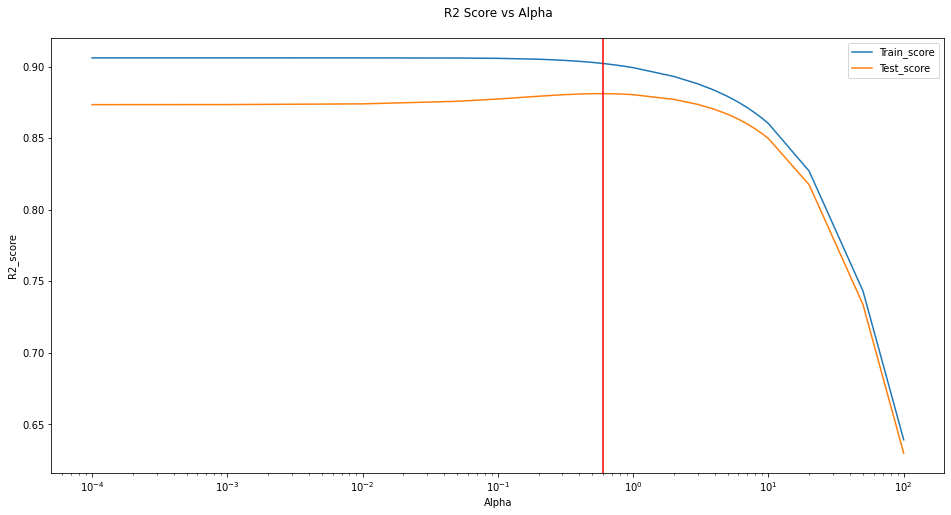

In [101]:
# plotting graph with mean test and train score with alpha

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('float64')

plt.figure(figsize = (16,8))

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])

plt.xlabel('Alpha')
plt.ylabel('R2_score')
plt.title('R2 Score vs Alpha\n ')
plt.xscale('log')  # Here i am chossing Xscale in logrithmic scale
plt.legend(['Train_score', 'Test_score'], loc='upper right')
plt.axvline(0.6, color='red')
alpha = ridge_cv_results['param_alpha'].loc[ridge_cv_results['mean_test_score'].idxmax()]

print('The optimum alpha is',alpha) # displaying optimum value of alpha

In [102]:
# Optimim value of alpha is 0.6

alpha = 0.6
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([ 0.22057092,  0.17709199,  0.14795523,  0.27601412,  0.39243451,
        0.29321268,  0.50197923, -0.36183608,  0.24522985,  0.14809819,
       -0.16902337, -0.49321515, -0.11780706, -0.16492151,  0.48394534,
        0.37455204,  0.39665573,  0.35295843, -0.10784868,  0.15347373,
        0.16276681, -0.22327874, -0.15591762,  0.23159703,  0.16505024,
        0.24057606, -0.24404957,  0.16146697, -0.24243904, -0.02158273,
        0.21733594,  0.15315644, -0.10328078, -0.10576915, -0.15727533,
        0.07366164,  0.08887489,  0.08416783,  0.14539117,  0.19087138,
       -0.1457507 ,  0.04063471, -0.02158273,  0.04063471, -0.06612918,
       -0.30273273, -0.19547224, -0.20557624,  0.09408253, -0.11754265])

In [103]:
# Displaying Ridge  model parameters and their cofficient

param = list(ridge.coef_ )
param = [round(x, 3) for x in param]
cols = X_train.columns

param = pd.DataFrame(list(zip(cols, param)))
param.columns = ['Variable', 'Ridge Coeff']
param.sort_values('Ridge Coeff', ascending=False).head(10)

Variable  Ridge Coeff
6    TotalBsmtSF        0.502
14      FullBath        0.484
16  BedroomAbvGr        0.397
4     BsmtFinSF2        0.392
15      HalfBath        0.375
17  KitchenAbvGr        0.353
5      BsmtUnfSF        0.293
3     BsmtFinSF1        0.276
8       1stFlrSF        0.245
25      HouseAge        0.241

In [104]:
# Calculating r2 score, RSS ( Residual Sum of Square ) and MSE (Mean square Error)  value for Ridge Regression Model

# R-Squarred
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric2.append(r2_test_lr)

# RSS

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric2.append(rss2_lr)

# Mse

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric2.append(mse_test_lr**0.5)

print("R-Square for Training Set: " , metric2[0])
print("R-Square for Test Set: " , metric2[1])
print("RSS for Training Set: " , metric2[2])
print("RSS for Test Set: " , metric2[3])
print("MSE for Training Set: " , metric2[4])
print("MSE for Test Set: " , metric2[5])

R-Square for Training Set:  0.9012159896084089
R-Square for Test Set:  0.8344960919590224
RSS for Training Set:  13.432522400612344
RSS for Test Set:  9.177664509204703
MSE for Training Set:  0.12156172245369909
MSE for Test Set:  0.14296934202800748


### Ridge penalise the model for becoming complex but unlike lasso it doesn't brings the coefficient to zero rather than it brings all the coefficient near to zero.

### Lasso Regression Model

In [105]:
# Applying Lasso Regression with various hyperparameter 'lambda'

lambdas = [0, 0.0001, 0.001, 0.01, 0.02, 0.1, 1, 10, 100, 200, 500, 1000]                          
for i in lambdas:                   # for each lambda we get different model coefficients
    lassoreg = Lasso(alpha = i)     # Initialize the Lasso Regression model with a specific lambda value
    lassoreg.fit(X_train1, y_train)  # fit the model on the polynomial features
    y_train_pred = lassoreg.predict(X_train1)  # Predict the y-values of train data
    y_test_pred = lassoreg.predict(X_test1)   # Predict the y-values of test data
    # Computing R2-score for train set
    print("\nR2-Score (Train set) for lambda ",i," is = " + str(r2_score(y_train, y_train_pred)))     
    # Computing R2-score for test set
    print("R2-Score (Test set) for lambda ",i," is = " + str(r2_score(y_test, y_test_pred))) 
    # print(lassoreg.coef_)                           # Model coefficients


R2-Score (Train set) for lambda  0  is = 0.9042276430859503
R2-Score (Test set) for lambda  0  is = 0.811700703597839

R2-Score (Train set) for lambda  0.0001  is = 0.9023699995292748
R2-Score (Test set) for lambda  0.0001  is = 0.8311458032655163

R2-Score (Train set) for lambda  0.001  is = 0.8719650832919191
R2-Score (Test set) for lambda  0.001  is = 0.840528072767972

R2-Score (Train set) for lambda  0.01  is = 0.765675945712861
R2-Score (Test set) for lambda  0.01  is = 0.7422009023181101

R2-Score (Train set) for lambda  0.02  is = 0.6663744429906622
R2-Score (Test set) for lambda  0.02  is = 0.6604253483742435

R2-Score (Train set) for lambda  0.1  is = 0.0
R2-Score (Test set) for lambda  0.1  is = -0.002239221499928057

R2-Score (Train set) for lambda  1  is = 0.0
R2-Score (Test set) for lambda  1  is = -0.002239221499928057

R2-Score (Train set) for lambda  10  is = 0.0
R2-Score (Test set) for lambda  10  is = -0.002239221499928057

R2-Score (Train set) for lambda  100  is =

### Inferences :
 - It can observed that as lambda value increases, higher is the regularisation.
 - Its also show that as the regularisation increases, R2-Score drops significantly, it will leads to underfitting.
 - Lasso regression pushes some of the coefficients to exactly 0, therby enabling feature selection.

In [106]:
# Let us determine the optimal value of lambda for Lasso Regression using cross validation

lasso = Lasso() # Applying lasso Regularisation

# list of alpha for hypertunning 

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.05]}

# folds for cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.05]},
             return_train_score=True, scoring='r2', verbose=1)

In [107]:
# taking the result in a new variable and displaying top 5 rows of it

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.012367      0.003340         0.001599        0.003198      0.0001   
1        0.014222      0.003045         0.001828        0.003657      0.0002   
2        0.012757      0.006394         0.003108        0.006216      0.0003   
3        0.012607      0.006408         0.000000        0.000000      0.0004   
4        0.010926      0.006267         0.001601        0.003202      0.0005   
5        0.003152      0.006304         0.003142        0.006284       0.001   
6        0.006235      0.007636         0.003202        0.006403       0.002   
7        0.003125      0.006249         0.003125        0.006249       0.003   
8        0.004025      0.006055         0.002301        0.004602       0.004   
9        0.003125      0.006250         0.003126        0.006252       0.005   
10       0.008153      0.007022         0.000000        0.000000        0.01   
11       0.006249      0.007654         0.000000        0.000000        0.05   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.846848           0.888643   
1   {'alpha': 0.0002}           0.843588           0.890760   
2   {'alpha': 0.0003}           0.840738           0.886639   
3   {'alpha': 0.0004}           0.837253           0.880691   
4   {'alpha': 0.0005}           0.832697           0.874569   
5    {'alpha': 0.001}           0.823896           0.857716   
6    {'alpha': 0.002}           0.809845           0.839049   
7    {'alpha': 0.003}           0.791623           0.824994   
8    {'alpha': 0.004}           0.776073           0.806706   
9    {'alpha': 0.005}           0.761150           0.791649   
10    {'alpha': 0.01}           0.713608           0.747443   
11    {'alpha': 0.05}           0.103795           0.082320   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0            0.910322           0.890382           0.862135         0.879666   
1            0.907580           0.899859           0.862021         0.880762   
2            0.905327           0.903246           0.861062         0.879402   
3            0.902201           0.902354           0.859380         0.876376   
4            0.897166           0.900336           0.857816         0.872517   
5            0.881061           0.895558           0.849525         0.861551   
6            0.868845           0.885821           0.848384         0.850389   
7            0.852345           0.872192           0.839595         0.836150   
8            0.835502           0.856928           0.829094         0.820861   
9            0.819346           0.842933           0.814414         0.805898   
10           0.779126           0.793178           0.770760         0.760823   
11           0.087561           0.101462           0.106738         0.096375   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.022448                2            0.914109            0.903019   
1         0.024154                1            0.910801            0.898256   
2         0.024997                3            0.906820            0.893573   
3         0.025218                4            0.903097            0.889486   
4         0.025248                5            0.899252            0.885709   
5         0.024957                6            0.886717            0.872804   
6         0.025971                7            0.868141            0.857243   
7         0.027131                8            0.852711            0.845366   
8         0.027529                9            0.838326            0.829342   
9         0.027678               10            0.823716            0.815314   
10        0.027889               11            0.770750            0.768771   
11        0.009629               12            0.103991            0.093831   

    split2_train_score  split3_train_score  split4_train_score  \
0       

In [108]:
# listing lasso parameter type

# lasso_cv_results['param_alpha'].info() # commenting this its not working in some system

In [109]:
# converting object to numerical

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

In [110]:
# printing top 5 lasso alpha parameter

lasso_cv_results['param_alpha'].head()

0    0.0001
1    0.0002
2    0.0003
3    0.0004
4    0.0005
Name: param_alpha, dtype: float64

In [111]:
# showing top 10 result of 'param_alpha', 'mean_train_score', 'mean_test_score' from result

lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score']].head(10)

param_alpha  mean_train_score  mean_test_score
0       0.0001          0.904608         0.879666
1       0.0002          0.901173         0.880762
2       0.0003          0.897261         0.879402
3       0.0004          0.893468         0.876376
4       0.0005          0.889931         0.872517
5       0.0010          0.874492         0.861551
6       0.0020          0.858303         0.850389
7       0.0030          0.844299         0.836150
8       0.0040          0.829344         0.820861
9       0.0050          0.814411         0.805898

In [112]:
# Printing the best hyperparameter alpha and best score for lasso

print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0002}
0.880761704606533


The optimum alpha is 0.0002


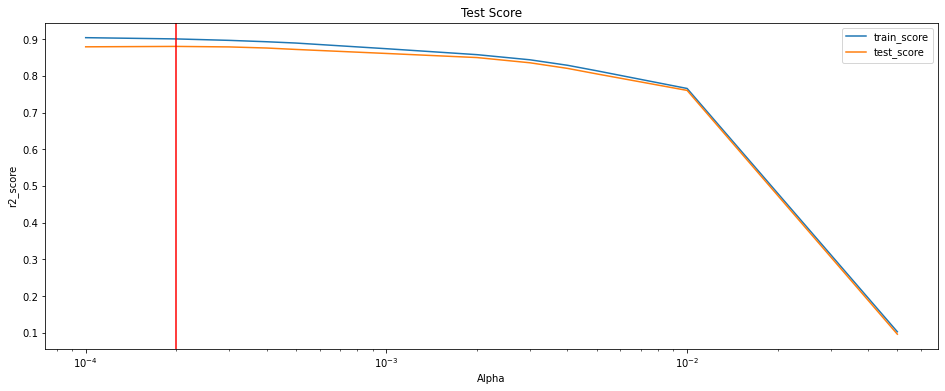

In [113]:
plt.figure(figsize = (16,6))

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])

plt.xlabel('Alpha')
plt.ylabel('r2_score')
plt.title('Test Score')
plt.xscale('log') # Here i am chossing Xscale in logrithmic scale
plt.legend(['train_score', 'test_score'], loc='upper right')
plt.axvline(0.0002, color='red')
alpha = lasso_cv_results['param_alpha'].loc[lasso_cv_results['mean_test_score'].idxmax()]

print('The optimum alpha is',alpha) # Displaying Optimum value of alpha

In [114]:
# Optimim value of alpha is 0.0002

alpha = 0.0002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train1, y_train)
lasso.coef_

array([ 0.11366231,  0.05544205,  0.        ,  0.46702864,  0.30693144,
        0.22539422,  0.60418623, -0.36378749,  0.24614251,  0.14616874,
       -0.10696167, -0.50060194, -0.02243118, -0.16231218,  0.51668907,
        0.41096584,  0.42854481,  0.38493612, -0.05058334,  0.15156658,
        0.1566717 , -0.16945829, -0.14522771,  0.14421613,  0.16529378,
        0.23552661, -0.272959  ,  0.1586384 , -0.23314281, -0.        ,
        0.10986686,  0.03176213, -0.        , -0.0278239 , -0.        ,
       -0.        ,  0.02679337,  0.02382833,  0.08368229,  0.1780325 ,
       -0.101347  ,  0.        , -0.        ,  0.        , -0.        ,
       -0.27402118, -0.18429644, -0.19770767,  0.01102539, -0.06108398])

In [115]:

# lasso model parameters and their respective coefficient

param = list(lasso.coef_ )
param = [round(x, 3) for x in param]
cols = X_train.columns

param = pd.DataFrame(list(zip(cols, param)))
param.columns = ['Variable', 'Coeff']
param[param['Coeff'] > 0 ]

Variable  Coeff
0                 LotFrontage  0.114
1                     LotArea  0.055
3                  BsmtFinSF1  0.467
4                  BsmtFinSF2  0.307
5                   BsmtUnfSF  0.225
6                 TotalBsmtSF  0.604
8                    1stFlrSF  0.246
9                    2ndFlrSF  0.146
14                   FullBath  0.517
15                   HalfBath  0.411
16               BedroomAbvGr  0.429
17               KitchenAbvGr  0.385
19                 GarageArea  0.152
20                 WoodDeckSF  0.157
23                ScreenPorch  0.144
24                    MiscVal  0.165
25                   HouseAge  0.236
27                  GarageAge  0.159
30      MSSubClass_1Story1946  0.110
31  MSSubClass_1StoryFinished  0.032
36       MSSubClass_2StoryPud  0.027
37          MSSubClass_Duplex  0.024
38        MSSubClass_PudMulti  0.084
39      MSSubClass_SplitFoyer  0.178
48            LandContour_HLS  0.011

In [116]:
# Displaying Top 10 Features

param.sort_values('Coeff', ascending=False).head(10)

Variable  Coeff
6    TotalBsmtSF  0.604
14      FullBath  0.517
3     BsmtFinSF1  0.467
16  BedroomAbvGr  0.429
15      HalfBath  0.411
17  KitchenAbvGr  0.385
4     BsmtFinSF2  0.307
8       1stFlrSF  0.246
25      HouseAge  0.236
5      BsmtUnfSF  0.225

In [117]:
# Calculating r2 score, RSS ( Residual Sum of Square ) and MSE (Mean square Error)  value for Ridge Regression Model

y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric3 = []
# R-squarred
r2_train_lr = r2_score(y_train, y_pred_train)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric3.append(r2_test_lr)
# Rss
rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric3.append(rss2_lr)
# Mse
mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric3.append(mse_test_lr**0.5)

print("R-Square for Training Set: " , metric3[0])
print("R-Square for Test Set: " , metric3[1])
print("RSS for Training Set: " , metric3[2])
print("RSS for Test Set: " , metric3[3])
print("MSE for Training Set: " , metric3[4])
print("MSE for Test Set: " , metric3[5])

R-Square for Training Set:  0.8986635796071374
R-Square for Test Set:  0.8400913268062482
RSS for Training Set:  13.779595822532698
RSS for Test Set:  8.867392752568383
MSE for Training Set:  0.12312218042220159
MSE for Test Set:  0.1405318623967698


## Linear , Ridge and lasso Metrics Comparrision

In [118]:
## different metrics and their comparrision

# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.904228          0.901216          0.898664
1   R2 Score (Test)           0.810512          0.834496          0.840091
2       RSS (Train)          13.023002         13.432522         13.779596
3        RSS (Test)          10.507662          9.177665          8.867393
4       MSE (Train)           0.119694          0.121562          0.123122
5        MSE (Test)           0.152978          0.142969          0.140532

### comparing changes in ridge and lasso coefficent after regularization

In [119]:
betas = pd.DataFrame(index=X_train1.columns)
betas.rows = X_train1.columns

In [120]:
# comparing ridge and lasso cofficient

betas['Ridge'] = ridge.coef_   # Ridge regression coffieceent
betas['Lasso'] = lasso.coef_   # lasso regression coffiecent
betas.head(50)

Ridge     Lasso
BsmtFinSF1                       0.220571  0.113662
BsmtFinSF2                       0.177092  0.055442
BsmtUnfSF                        0.147955  0.000000
TotalBsmtSF                      0.276014  0.467029
1stFlrSF                         0.392435  0.306931
2ndFlrSF                         0.293213  0.225394
GrLivArea                        0.501979  0.604186
KitchenAbvGr                    -0.361836 -0.363787
GarageArea                       0.245230  0.246143
ScreenPorch                      0.148098  0.146169
MiscVal                         -0.169023 -0.106962
HouseAge                        -0.493215 -0.500602
MSSubClass_1-1/2StoryUnfinished -0.117807 -0.022431
MSSubClass_2StoryPud            -0.164922 -0.162312
MSZoning_FV                      0.483945  0.516689
MSZoning_RH                      0.374552  0.410966
MSZoning_RL                      0.396656  0.428545
MSZoning_RM                      0.352958  0.384936
LandSlope_Sev                   -0.107849 -0.050583
Neighborhood_Crawfor             0.153474  0.151567
Neighborhood_StoneBr             0.162767  0.156672
Condition1_PosA                 -0.223279 -0.169458
Condition1_RRAe                 -0.155918 -0.145228
HouseStyle_1.5Unf                0.231597  0.144216
OverallQual_OQ_Excellent         0.165050  0.165294
OverallQual_OQ_VExcellent        0.240576  0.235527
OverallQual_OQ_VPoor            -0.244050 -0.272959
OverallCond_OC_Excellent         0.161467  0.158638
OverallCond_OC_Fair             -0.242439 -0.233143
OverallCond_OC_Very Poor        -0.021583 -0.000000
RoofMatl_Metal                   0.217336  0.109867
RoofMatl_WdShake                 0.153156  0.031762
Exterior1st_CBlock              -0.103281 -0.000000
Exterior1st_CemntBd             -0.105769 -0.027824
Exterior1st_Stone               -0.157275 -0.000000
Exterior2nd_CmentBd              0.073662 -0.000000
MasVnrType_BrkFace               0.088875  0.026793
MasVnrType_None                  0.084168  0.023828
MasVnrType_Stone                 0.145391  0.083682
Foundation_Stone                 0.190871  0.178033
Foundation_Wood                 -0.145751 -0.101347
BsmtCond_No Basement             0.040635  0.000000
BsmtCond_Po                     -0.021583 -0.000000
BsmtExposure_No Basement         0.040635  0.000000
BsmtFinType2_No Basement        -0.066129 -0.000000
Heating_Grav                    -0.302733 -0.274021
Functional_Maj2                 -0.195472 -0.184296
Functional_Mod                  -0.205576 -0.197708
SaleType_ConLw                   0.094083  0.011025
SaleType_Oth                    -0.117543 -0.061084

## Residual Analysis

### Model Evaluation
  - Model is ready but we have check realiablity and credibility of the model, for this validate the assumptions that made before building the model

### Ridge Residual Analysis

In [121]:
# ridge prediction
ridge_pred = ridge.predict(X_test1)

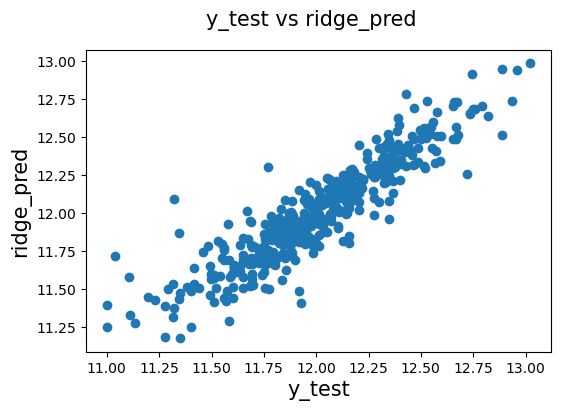

In [122]:
# Plotting y_test and y_pred to understand the spread for ridge regression.

fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred\n', fontsize=15)              # Plot heading 
plt.xlabel('y_test', fontsize=15)                          # X-label
plt.ylabel('ridge_pred', fontsize=15)  
plt.show()

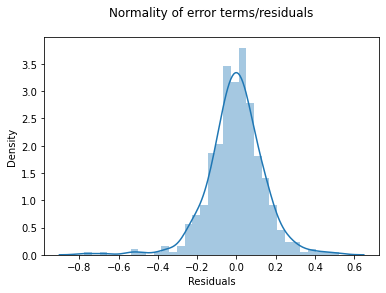

In [123]:
y_res=y_test-ridge_pred

# Distribution of errors

sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals\n')
plt.xlabel("Residuals")
plt.show()

### Lasso residual Analysis

In [124]:
# lasso prediction
lasso_pred = lasso.predict(X_test1)

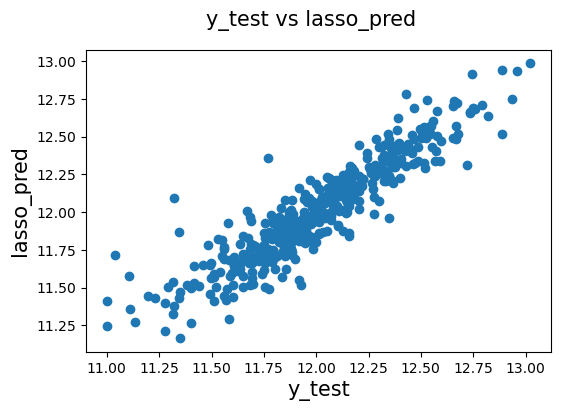

In [125]:
# Plotting y_test and y_pred to understand the spread for lasso regression.

fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred\n', fontsize=15)              # Plot heading 
plt.xlabel('y_test', fontsize=15)                          # X-label
plt.ylabel('lasso_pred', fontsize=15)  
plt.show()

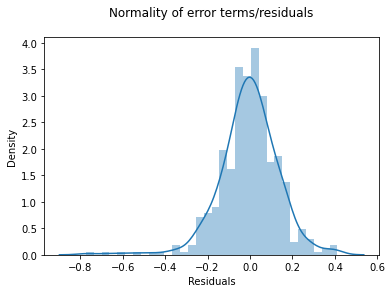

In [126]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals\n')
plt.xlabel("Residuals")
plt.show()

**Verifying the error terms having constant variance accross different independent variables and they do not follow any pattern**

In [127]:
# defining Train and test residual

res_train = y_train - y_pred_train 
res_test = y_test - y_pred_test

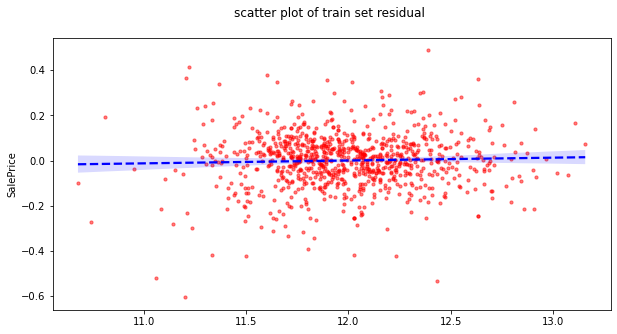

In [128]:
# regression scatter plot for train set

plt.figure(figsize = (10,5))
sns.regplot(x=y_pred_train, y=res_train, fit_reg=True, scatter_kws={'s': 10, 'alpha': 0.5, 'color': 'red'},
           line_kws={'linestyle': '--'}, color='blue')
plt.title('scatter plot of train set residual \n')
plt.show()

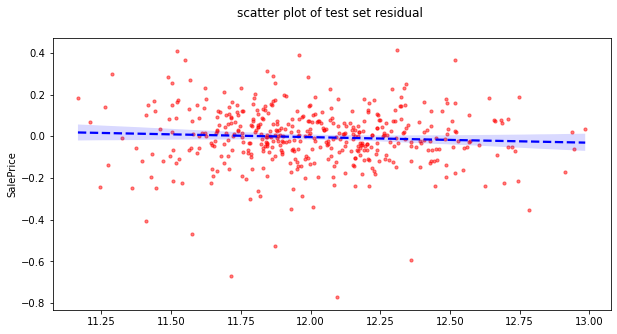

In [129]:
# regression scatter plot for test set
plt.figure(figsize = (10,5))
sns.regplot(x=y_pred_test, y=res_test, fit_reg=True, scatter_kws={'s': 10, 'alpha': 0.5,
                                                                  'color': 'red'},
                                                line_kws={'linestyle': '--'}, color='blue')
plt.title('scatter plot of test set residual \n')
plt.show()

### Top 5 Positive coefficients i.e) Sales increase with respect to these variables

In [130]:
#  Displaying Top 5 possitive coefficient

param.sort_values('Coeff', ascending=False).head(5)

Variable  Coeff
6    TotalBsmtSF  0.604
14      FullBath  0.517
3     BsmtFinSF1  0.467
16  BedroomAbvGr  0.429
15      HalfBath  0.411

#### Top 5 Negative co.efficients i.e) Sales decrease with respect to these variables

In [131]:
# Displaying Top 5 negative coefficient

param.sort_values('Coeff', ascending=True).head()

Variable  Coeff
11                        GrLivArea -0.501
7                        CentralAir -0.364
45                     LotShape_IR2 -0.274
26                       RemodelAge -0.273
28  MSSubClass_1-1/2StoryUnfinished -0.233

In [132]:
# our final model using lasso

lasso.intercept_

model = str(round(lasso.intercept_, 3)) + " + "

for var, coeff in zip(param[param['Coeff'] > 0]['Variable'], param[param['Coeff'] > 0]['Coeff']):
    model += str(coeff) + '*' + var + ' + '

model = model[:-3]

print('Final Model : ', model)

Final Model :  10.956 + 0.114*LotFrontage + 0.055*LotArea + 0.467*BsmtFinSF1 + 0.307*BsmtFinSF2 + 0.225*BsmtUnfSF + 0.604*TotalBsmtSF + 0.246*1stFlrSF + 0.146*2ndFlrSF + 0.517*FullBath + 0.411*HalfBath + 0.429*BedroomAbvGr + 0.385*KitchenAbvGr + 0.152*GarageArea + 0.157*WoodDeckSF + 0.144*ScreenPorch + 0.165*MiscVal + 0.236*HouseAge + 0.159*GarageAge + 0.11*MSSubClass_1Story1946 + 0.032*MSSubClass_1StoryFinished + 0.027*MSSubClass_2StoryPud + 0.024*MSSubClass_Duplex + 0.084*MSSubClass_PudMulti + 0.178*MSSubClass_SplitFoyer + 0.011*LandContour_HLS


### -----------------------------------------------------------------------------------

## Summary and Conclusion

In [133]:
## different metrics and their comparrision

# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.904228          0.901216          0.898664
1   R2 Score (Test)           0.810512          0.834496          0.840091
2       RSS (Train)          13.023002         13.432522         13.779596
3        RSS (Test)          10.507662          9.177665          8.867393
4       MSE (Train)           0.119694          0.121562          0.123122
5        MSE (Test)           0.152978          0.142969          0.140532

### Top most significant variable in Lasso Regression:

- `TotalBsmtSF` : 0.604
- `FullBath`    : 0.517
- `BsmtFinSF1`  : 0.467
- `BedroomAbvGr`: 0.429
- `HalfBath`    : 0.411

## Conclusion


**decent score of both Ridge and Lasso Regression**
 - Ridge R-Squarred Train      : 90.12   Test : 83.44
 - Lasso R-Squarred Train      : 89.86   Test : 84.00
 - Optimal value lambda  Ridge : 0.6
 - Optimal value lambda  Ridge : 0.0002

**Both model given decent value of R-squarred on test data but although Ridge regression is better in r-squarred value of train set,**
- but because of features selection property of Lasso its bring and assign a zero value to insignificant features we can choose Lasso Regression to predict SalePrice of Housing Model.
- we should always use simple yet robust model.

**********************************************************************************************

## Assignment Part-II

**Subjective Question Part**

### Question 1

**What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**

#### Answer : -

The optimal value of alpha for Ridge : 0.6 and Lasso : 0.0002

#### Ridge Regression model after alpha `double from 0.6 to 1.2`

In [134]:
# Building Ridge Model by double the value of alpha from 0.6 to 1.2

ridge_double = Ridge(alpha=1.2)
ridge_double.fit(X_train1,y_train)
ridge_double_coef = ridge_double.coef_
y_pred_test = ridge_double.predict(X_test1)


# Calculating r2 score, RSS ( Residual Sum of Square ) and MSE (Mean square Error)  value for Ridge Regression Model

# R-Squarred
y_pred_train = ridge_double.predict(X_train1)


metricRdouble = []
r2_train_lr = r2_score(y_train, y_pred_train)
metricRdouble.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metricRdouble.append(r2_test_lr)

# RSS

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metricRdouble.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metricRdouble.append(rss2_lr)

# Mse

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metricRdouble.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metricRdouble.append(mse_test_lr**0.5)

print("R-Square for Training Set after Ridge double alpha: " , metricRdouble[0])
print("R-Square for Test Set after Ridge double alpha: " , metricRdouble[1])
print("RSS for Training Set after Ridge double alpha: " , metricRdouble[2])
print("RSS for Test Set after Ridge double alpha: " , metricRdouble[3])
print("MSE for Training Set after Ridge double alpha: " , metricRdouble[4])
print("MSE for Test Set after Ridge double alpha: " , metricRdouble[5])


R-Square for Training Set after Ridge double alpha:  0.8977198312491077
R-Square for Test Set after Ridge double alpha:  0.8407091435363013
RSS for Training Set after Ridge double alpha:  13.90792550776741
RSS for Test Set after Ridge double alpha:  8.83313304992017
MSE for Training Set after Ridge double alpha:  0.12369417158198072
MSE for Test Set after Ridge double alpha:  0.1402601230415656


In [135]:
param2 = list(ridge_double.coef_)
param2 = [round(x, 3) for x in param2]
cols = X_train.columns

param2 = pd.DataFrame(list(zip(cols, param2)))
param2.columns = ['Variable', 'Ridge double Coeff']
param2.sort_values('Ridge double Coeff', ascending=False).head(10)

Variable  Ridge double Coeff
6    TotalBsmtSF               0.520
14      FullBath               0.397
4     BsmtFinSF2               0.360
16  BedroomAbvGr               0.315
15      HalfBath               0.282
5      BsmtUnfSF               0.277
3     BsmtFinSF1               0.270
17  KitchenAbvGr               0.267
8       1stFlrSF               0.250
25      HouseAge               0.222

### Lasso Regression model after alpha `double from alpha 0.0002 to 0.0004`

In [136]:
# Building Ridge Model by double the value of alpha from 0.0002 to 0.0004

lasso_double = Lasso(alpha=0.0004)
lasso_double.fit(X_train1,y_train)
lasso_double_coef = lasso_double.coef_
y_pred_test = lasso_double.predict(X_test1)


# Calculating r2 score, RSS ( Residual Sum of Square ) and MSE (Mean square Error)  value for Ridge Regression Model

# R-Squarred
y_pred_train = lasso_double.predict(X_train1)


metricLdouble = []
r2_train_lr = r2_score(y_train, y_pred_train)
metricLdouble.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metricLdouble.append(r2_test_lr)

# RSS

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metricLdouble.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metricLdouble.append(rss2_lr)

# Mse

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metricLdouble.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metricLdouble.append(mse_test_lr**0.5)

print("R-Square for Training Set after Lasso double alpha: " , metricLdouble[0])
print("R-Square for Test Set after Lasso double alpha: " , metricLdouble[1])
print("RSS for Training Set after Lasso double alpha: " , metricLdouble[2])
print("RSS for Test Set after Lasso double alpha: " , metricLdouble[3])
print("MSE for Training Set after Lasso double alpha: " , metricLdouble[4])
print("MSE for Test Set after Lasso double alpha: " , metricLdouble[5])


R-Square for Training Set after Lasso double alpha:  0.891861032894395
R-Square for Test Set after Lasso double alpha:  0.8453355462164229
RSS for Training Set after Lasso double alpha:  14.704597356059246
RSS for Test Set after Lasso double alpha:  8.576585804690595
MSE for Training Set after Lasso double alpha:  0.12718755740692989
MSE for Test Set after Lasso double alpha:  0.13820827545648673


In [137]:
## different metrics and their comparrision

# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
rg_metric_double = pd.Series(metricRdouble, name = 'Ridge alpha double')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
ls_metric_double = pd.Series(metricLdouble, name = 'Lasso alpha double')

final_metric = pd.concat([lr_metric, rg_metric, rg_metric_double, ls_metric, ls_metric_double], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Ridge alpha double  \
0  R2 Score (Train)           0.904228          0.901216            0.897720   
1   R2 Score (Test)           0.810512          0.834496            0.840709   
2       RSS (Train)          13.023002         13.432522           13.907926   
3        RSS (Test)          10.507662          9.177665            8.833133   
4       MSE (Train)           0.119694          0.121562            0.123694   
5        MSE (Test)           0.152978          0.142969            0.140260   

   Lasso Regression  Lasso alpha double  
0          0.898664            0.891861  
1          0.840091            0.845336  
2         13.779596           14.704597  
3          8.867393            8.576586  
4          0.123122            0.127188  
5          0.140532            0.138208

In [138]:
param3 = list(lasso_double.coef_)
param3 = [round(x, 3) for x in param3]
cols = X_train.columns

param3 = pd.DataFrame(list(zip(cols, param3)))
param3.columns = ['Variable', 'Lasso double Coeff']
param3.sort_values('Lasso double Coeff', ascending=False).head(10)

Variable  Lasso double Coeff
6    TotalBsmtSF               0.862
3     BsmtFinSF1               0.467
14      FullBath               0.391
16  BedroomAbvGr               0.310
15      HalfBath               0.281
17  KitchenAbvGr               0.263
8       1stFlrSF               0.250
25      HouseAge               0.207
27     GarageAge               0.163
24       MiscVal               0.156

#### Since the alpha value was quite small 0.6 for Ridge and 0.0002 for Lasso , 
 **doubling its alpha value doesn't do any significant changes in both the models and the R-Squarred, RSE and MSE remains almost the same. The most important predictor variables also remain the same, but TotalBsmtSF attributes gains high in the Lasso Model.**

## Question 3

**After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

### Answer

In [139]:
X_train_drop5 = X_train
X_test_drop5 = X_test

In [140]:
# dropping five most important predictor variables from train and test dataset

X_train_drop5 = X_train_drop5.drop(['TotalBsmtSF', 'FullBath', 'BsmtFinSF1', 'BedroomAbvGr', 'HalfBath'], axis=1)
X_test_drop5 = X_test_drop5.drop(['TotalBsmtSF', 'FullBath', 'BsmtFinSF1', 'FullBath', 'BedroomAbvGr', 'HalfBath'], axis=1)

In [141]:
X_train_drop5.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF2  BsmtUnfSF  CentralAir  \
867      0.418301  0.230981    0.000000         0.0   0.052786         1.0   
496      0.313725  0.473758    0.000000         0.0   0.962366         1.0   
932      0.411765  0.430396    0.471875         0.0   0.931085         1.0   
1355     0.529412  0.367686    0.223438         0.0   0.278592         1.0   
913      0.398693  0.201281    0.000000         0.0   0.350440         0.0   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
867   0.271596  0.000000           0.0   0.340407      0.333333           0.0   
496   1.000000  0.000000           0.0   1.000000      0.333333           0.0   
932   0.542847  0.000000           0.0   0.680381      0.000000           0.0   
1355  0.306842  0.453247           0.0   0.686877      0.000000           0.0   
913   0.230477  0.650000           0.0   0.722391      0.000000           0.0   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
867            0.0    0.000000    0.559671    0.354430     0.000000   
496            0.0    0.333333    0.561728    0.556962     0.286260   
932            0.0    0.333333    0.810700    0.000000     0.729008   
1355           0.0    0.333333    0.501029    0.000000     0.374046   
913            0.5    0.000000    0.896091    0.000000     0.000000   

      EnclosedPorch  ScreenPorch   MiscVal  HouseAge  RemodelAge  GarageAge  \
867        0.000000          0.0  0.048193  0.338235    0.766667   0.450980   
496        0.753886          0.0  0.000000  0.110294    0.233333   0.147059   
932        0.000000          0.0  0.000000  0.007353    0.016667   0.009804   
1355       0.000000          0.0  0.000000  0.279412    0.233333   0.372549   
913        0.000000          0.0  0.000000  0.426471    0.950000   0.568627   

      MSSubClass_1-1/2StoryUnfinished  MSSubClass_1Story1945  \
867                                 0                      0   
496                                 0                      0   
932                                 0                      0   
1355                                0                      0   
913                                 0                      0   

      MSSubClass_1Story1946  MSSubClass_1StoryFinished  MSSubClass_1StoryPud  \
867                       1                          0                     0   
496                       1                          0                     0   
932                       1                          0                     0   
1355                      0                          0                     0   
913                       0                          0                     0   

      MSSubClass_2-1/2Story  MSSubClass_2Family  MSSubClass_2Story1946  \
867                       0                   0                      0   
496                       0                   0                      0   
932                       0                   0                      0   
1355                      0                   0                      0   
913                       0                   0                      0   

      MSSubClass_2StoryPud  MSSubClass_Duplex  MSSubClass_PudMulti  \
867                      0                  0                    0   
496                      0                  0                    0   
932                      0                  0                    0   
1355                     0                  0                    0   
913                      0                  1                    0   

      MSSubClass_SplitFoyer  MSSubClass_SplitMulti  MSZoning_FV  MSZoning_RH  \
867                       0                      0            0            0   
496                       0                      0            0            0   
932                       0                      0            0            0   
1355                      0                      1            0            0   
913             

In [142]:
lasso3 = Lasso(alpha=0.0002)
lasso3.fit(X_train_drop5,y_train)
lasso3_coef = lasso3.coef_
y_pred_test = lasso3.predict(X_test_drop5)
y_pred_train = lasso3.predict(X_train_drop5)

# Calculating r2 score, RSS ( Residual Sum of Square ) and MSE (Mean square Error)  value for Ridge Regression Model

# R-Squarred

metricQ3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metricQ3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metricQ3.append(r2_test_lr)

# RSS

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metricQ3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metricQ3.append(rss2_lr)

# Mse

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metricQ3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metricQ3.append(mse_test_lr**0.5)

print("R-Square for Training Set after removing 5 most predictor: " , metricQ3[0])
print("R-Square for Test Set after removing 5 most predictor: " , metricQ3[1])
print("RSS for Training Set after removing 5 most predictor: " , metricQ3[2])
print("RSS for Test Set after removing 5 most predictor: " , metricQ3[3])
print("MSE for Training Set after removing 5 most predictor: " , metricQ3[4])
print("MSE for Test Set after removing 5 most predictor: " , metricQ3[5])


R-Square for Training Set after removing 5 most predictor:  0.9450980555537205
R-Square for Test Set after removing 5 most predictor:  0.8906380976361307
RSS for Training Set after removing 5 most predictor:  7.465495637283822
RSS for Test Set after removing 5 most predictor:  6.064429909023584
MSE for Training Set after removing 5 most predictor:  0.09062486682837648
MSE for Test Set after removing 5 most predictor:  0.11621757788670387


In [143]:
paramQ3 = list(lasso3.coef_)
paramQ3 = [round(x, 3) for x in paramQ3]
cols = X_train_drop5.columns

paramQ3 = pd.DataFrame(list(zip(cols, paramQ3)))
paramQ3.columns = ['Variable', 'Lasso Q3 Coeff']
paramQ3.sort_values('Lasso Q3 Coeff', ascending=False).head(10)

Variable  Lasso Q3 Coeff
9                    GrLivArea           0.499
6                     1stFlrSF           0.381
36                 MSZoning_FV           0.287
37                 MSZoning_RH           0.261
38                 MSZoning_RL           0.257
39                 MSZoning_RM           0.235
101  OverallQual_OQ_VExcellent           0.202
97    OverallQual_OQ_Excellent           0.193
14                  GarageArea           0.160
104   OverallCond_OC_Excellent           0.129

**********************************************************************************************